## Preparation

In [1]:
!pip install torch==1.9.0

     |████████████████████████████████| 831.4 MB 2.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.


In [2]:
import torch.nn as nn
import sys
import torch
from matplotlib import pyplot as plt
%matplotlib inline
torch.__version__

'1.9.0+cu102'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# For drive
path = "/content/drive/My Drive/project/"

sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")
sys.path.append(path + "URP/forgetting")

In [5]:
# For PC
'''
path = ".."
sys.path.append(path)
sys.path.append(path + "/learning")
sys.path.append(path + "/data")
sys.path.append(path + "/models")
sys.path.append(path + "/forgetting")
'''

'\npath = ".."\nsys.path.append(path)\nsys.path.append(path + "/learning")\nsys.path.append(path + "/data")\nsys.path.append(path + "/models")\nsys.path.append(path + "/forgetting")\n'

In [6]:
from data_utils import * #show_random, AddNoise, remove_random, remove_class, combine_datasets
from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from models_utils import *
import models
from learn import *
from forget import *
from forget import FD
from utils import set_seed

In [7]:
set_seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

SEED SET TO:  13


device(type='cuda', index=0)

##Models and Datasets

In [8]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)
print('-'*20)

cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)
print('-'*20)

#cnn_model_retrain = copy.deepcopy(cnn_model)
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar-10-python.tar.gz to /root/data
Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
CNN
--------------------
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.9684426188468933
Error:  0.125
FINISHED TESTING


In [9]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)
print('-'*20)

dnn = {"input_size": 1024, "hidden_size":64, "num_classes":10,"num_layer": 10, "activation": nn.ReLU()}
dnn_model = get_model("mlp", **dnn)
print(dnn_model.__class__.__name__)
print('-'*20)

checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
_ = test(model=dnn_model, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='mnist', test_loader=mnist_test, at_epoch=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
MLP
--------------------
SEED SET TO:  13
Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.02780456840991974
Error:  0.0
FINISHED TESTING


In [10]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)
print('-'*20)

resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
resnet18_model = get_model("resnet18", **resnet18)
print(resnet18_model.__class__.__name__)
print('-'*20)

checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
_ = test(model=resnet18_model, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='cifar', test_loader=cifar100_test, at_epoch=None)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/data/cifar-100-python.tar.gz to /root/data
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
ResNet18
--------------------
SEED SET TO:  13
Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.240086317062378
Error:  0.5
FINISHED TESTING


In [11]:
fmnist_train, fmnist_val, fmnist_test = get_dataset("fashion-mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)
print('-'*20)

regression = LinearRegression(1024, 10)
print(regression.__class__.__name__)
print('-'*20)

checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
_ = test(model=regression, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='mnist', test_loader=fmnist_test, at_epoch=None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32
--------------------
LinearRegression
--------------------
SEED SET TO:  13
Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.822019636631012
Error:  0.25
FINISHED TESTING


## My methods

### Forget class

#### Feature Destruction

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.6384283304214478, "error": 0.3125}
[0] test metrics:{"loss": 3.6284537315368652, "error": 0.9354838728904724}
Epoch number: 0 
Epoch Time: 3.08 sec
[1] train metrics:{"loss": 0.4103986918926239, "error": 0.125}
[1] test metrics:{"loss": 3.9146556854248047, "error": 0.9677419364452362}
Epoch number: 1 
Epoch Time: 3.08 sec
[2] train metrics:{"loss": 0.22080618143081665, "error": 0.125}
[2] test metrics:{"loss": 4.218057632446289,

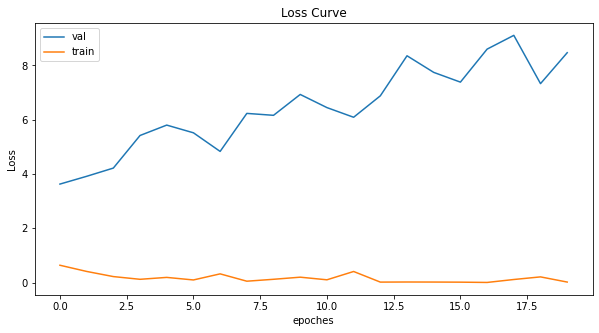

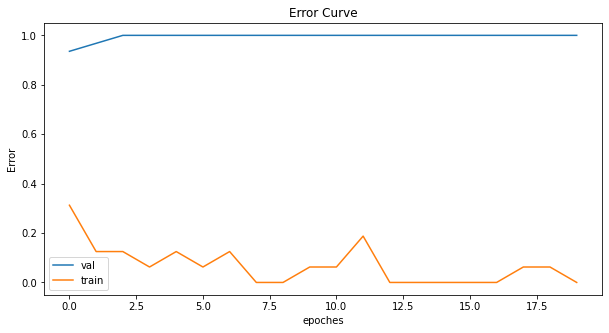

Forget time is: 61.68812155723572
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  8.468262672424316
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.5290632247924805
Error:  0.3333333134651184
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
#test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar', test_loader=cifar10_test, at_epoch=None)
#print('FORGETTING IMPLEMENTATION')
# All in one class
fd = FD(0, 0.2)
fd.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

checking on different noise type

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.6078726053237915, "error": 0.25}
[0] test metrics:{"loss": 3.3631060123443604, "error": 0.9032258093357086}
Epoch number: 0 
Epoch Time: 3.07 sec
[1] train metrics:{"loss": 0.413316547870636, "error": 0.1875}
[1] test metrics:{"loss": 3.980456829071045, "error": 0.9677419364452362}
Epoch number: 1 
Epoch Time: 3.07 sec
[2] train metrics:{"loss": 0.390577107667923, "error": 0.125}
[2] test metrics:{"loss": 4.029811382293701, "err

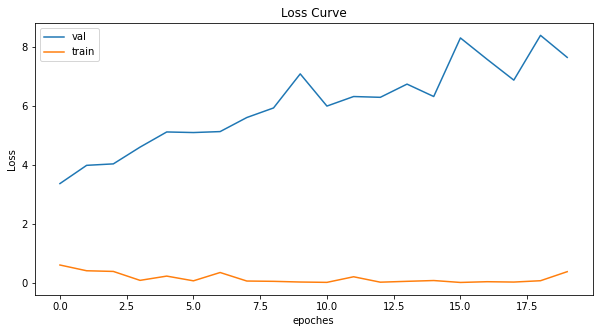

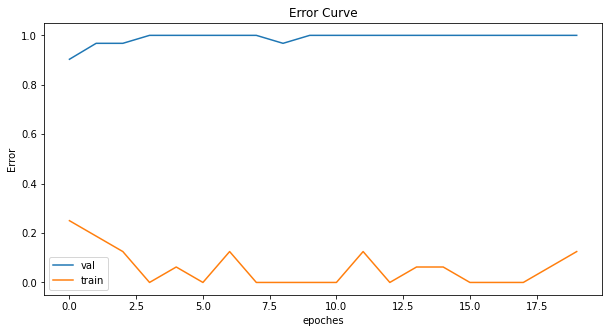

Forget time is: 61.80666971206665
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  7.633224010467529
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.044525146484375
Error:  0.1111111044883728
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

fd = FD(0, 0.1)
fd.noise.noise_type = 's&p'

fd.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)


SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.5295658707618713, "error": 0.1875}
[0] test metrics:{"loss": 3.5804052352905273, "error": 0.9032258093357086}
Epoch number: 0 
Epoch Time: 3.06 sec
[1] train metrics:{"loss": 0.3539256751537323, "error": 0.125}
[1] test metrics:{"loss": 4.0486741065979, "error": 1.0}
Epoch number: 1 
Epoch Time: 3.05 sec
[2] train metrics:{"loss": 0.2719382047653198, "error": 0.125}
[2] test metrics:{"loss": 4.766201496124268, "error": 1.0}
Epoc

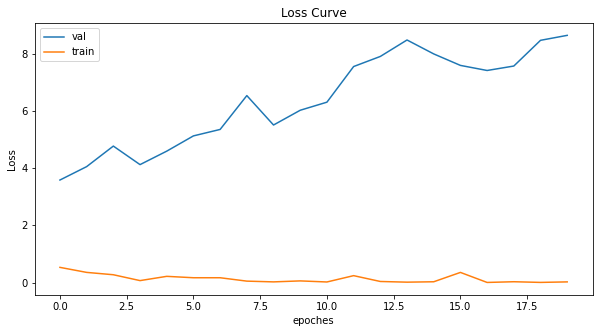

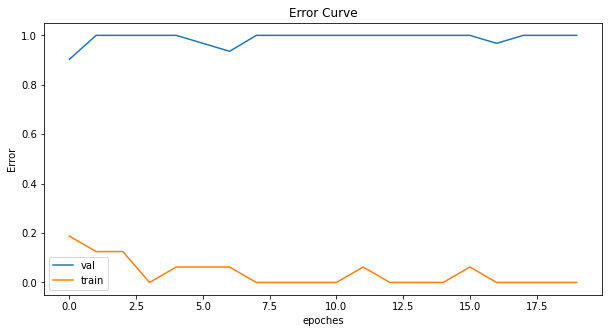

Forget time is: 61.60042405128479
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  8.634441375732422
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.5091516971588135
Error:  0.3333333134651184
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
fd = FD(0, 0.2)
fd.noise.noise_type = 'speckle'

fd.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.5458844900131226, "error": 0.1875}
[0] test metrics:{"loss": 3.766261100769043, "error": 0.8709677457809448}
Epoch number: 0 
Epoch Time: 3.09 sec
[1] train metrics:{"loss": 0.43332788348197937, "error": 0.25}
[1] test metrics:{"loss": 3.958256959915161, "error": 0.9677419364452362}
Epoch number: 1 
Epoch Time: 3.05 sec
[2] train metrics:{"loss": 0.20629073679447174, "error": 0.0625}
[2] test metrics:{"loss": 4.309069633483887, 

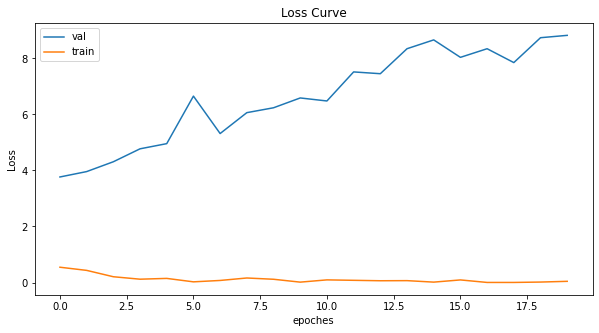

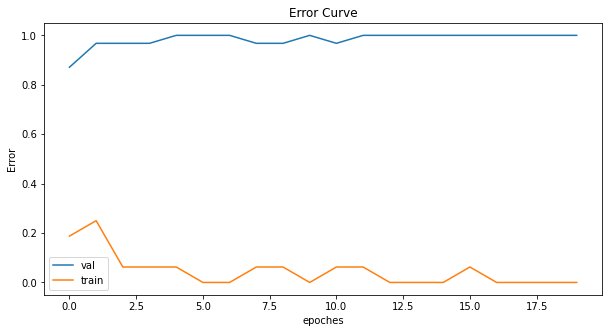

Forget time is: 61.38783383369446
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  8.81949520111084
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.015341877937317
Error:  0.2222222089767456
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

fd = FD(0, 0.1)
fd.noise.noise_type = 'poisson'

fd.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

here is ends

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.040383677929639816
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04301955923438072
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.08657941222190857, "error": 0.0}
[0] test metrics:{"loss": 0.29141709208488464, "error": 0.0}
Epoch number: 0 
Epoch Time: 1.47 sec
[1] train metrics:{"loss": 0.05222870782017708, "error": 0.0}
[1] test metrics:{"loss": 0.3005414307117462, "error": 0.19999998807907104}
Epoch number: 1 
Epoch Time: 1.43 sec
[2] train metrics:{"loss": 0.0378173366189003, "error": 0.0}
[2] test metrics:{"loss": 0.2099684774875641, "error": 0.0}
Epoch number: 2 
Epoch Time: 1.

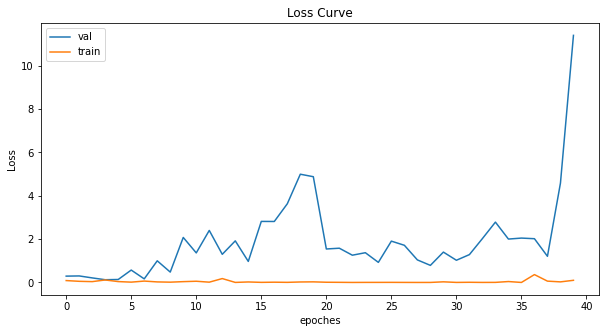

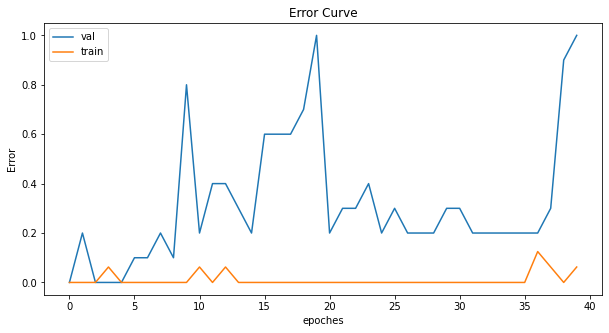

Forget time is: 58.49387574195862
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  11.40778923034668
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.07498620450496674
Error:  0.03333330154418945
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
fd.noise.std = 1.4
fd.forget_class(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.040383677929639816
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04301955923438072
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.08579861372709274, "error": 0.0}
[0] test metrics:{"loss": 0.13427771627902985, "error": 0.0}
Epoch number: 0 
Epoch Time: 1.47 sec
[1] train metrics:{"loss": 0.11501073092222214, "error": 0.0625}
[1] test metrics:{"loss": 1.140514612197876, "error": 0.5}
Epoch number: 1 
Epoch Time: 1.47 sec
[2] train metrics:{"loss": 0.08869925886392593, "error": 0.0625}
[2] test metrics:{"loss": 0.565109372138977, "error": 0.0}
Epoch number: 2 
Epoch Time: 1.43 sec
[3] 

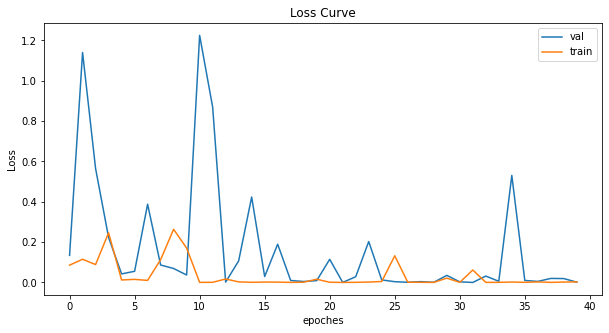

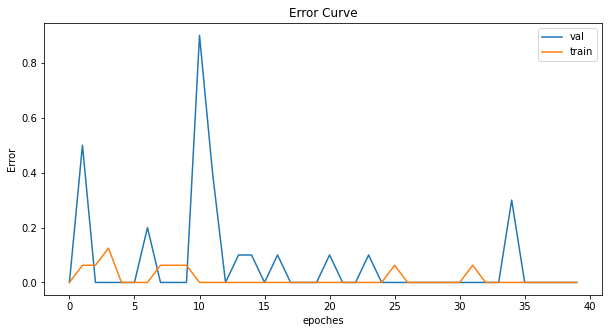

Forget time is: 58.69403338432312
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.0013327604392543435
Error:  0.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.0022763980086892843
Error:  0.0
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
fd.noise.std = 2.0
fd.noise.noise_type = 'speckle'
fd.forget_class(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.040383677929639816
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04301955923438072
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.1417694389820099, "error": 0.0}
[0] test metrics:{"loss": 0.3242355287075043, "error": 0.0}
Epoch number: 0 
Epoch Time: 1.48 sec
[1] train metrics:{"loss": 0.06520140916109085, "error": 0.0}
[1] test metrics:{"loss": 0.5677634477615356, "error": 0.09999996423721313}
Epoch number: 1 
Epoch Time: 1.44 sec
[2] train metrics:{"loss": 0.19869615137577057, "error": 0.0625}
[2] test metrics:{"loss": 0.3811410069465637, "error": 0.0}
Epoch number: 2 
Epoch Time: 

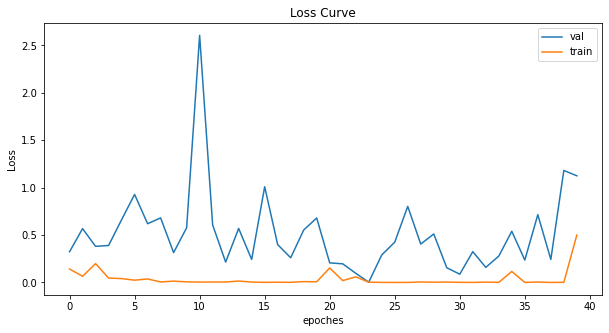

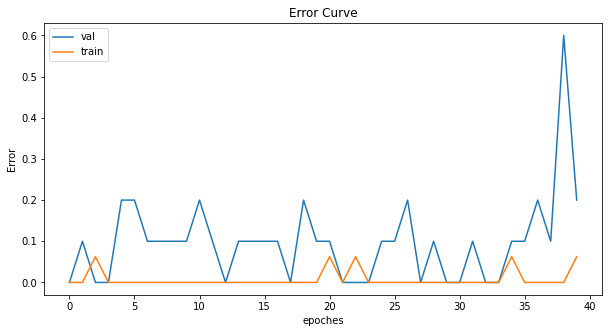

Forget time is: 58.16977071762085
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.1250312328338623
Error:  0.19999998807907104
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.4432006776332855
Error:  0.09999996423721313
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
fd.noise.std = 2.3
fd.noise.noise_type = 'poisson'
fd.forget_class(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.040383677929639816
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04301955923438072
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.08657941222190857, "error": 0.0}
[0] test metrics:{"loss": 0.29141709208488464, "error": 0.0}
Epoch number: 0 
Epoch Time: 1.45 sec
[1] train metrics:{"loss": 0.05222870782017708, "error": 0.0}
[1] test metrics:{"loss": 0.3005414307117462, "error": 0.19999998807907104}
Epoch number: 1 
Epoch Time: 1.45 sec
[2] train metrics:{"loss": 0.0378173366189003, "error": 0.0}
[2] test metrics:{"loss": 0.2099684774875641, "error": 0.0}
Epoch number: 2 
Epoch Time: 1.

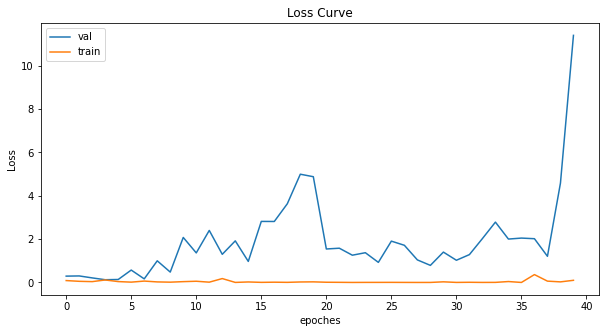

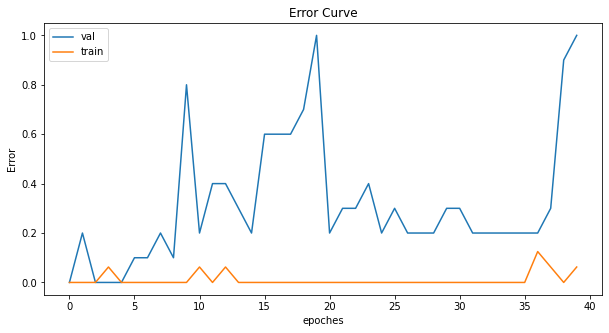

Forget time is: 58.807289361953735
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  11.40778923034668
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.07498620450496674
Error:  0.03333330154418945
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
fd.noise.std = 1.4
fd.noise.noise_type = 's&p'
fd.forget_class(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.046571388840675354
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.598691701889038
Error:  0.5555555522441864
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.342442512512207, "error": 0.53125}
[0] test metrics:{"loss": 13.73145580291748, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.84 sec
[1] train metrics:{"loss": 1.8940049409866333, "error": 0.46875}
[1] test metrics:{"loss": 9.45162296295166, "error": 1.0}
Epoch number: 1 
Epoch Time: 8.81 sec
[2] train metrics:{"loss": 1.4765652418136597, "error": 0.375}
[2] test metrics:{"loss": 10.23746109008789, "error": 1.0}
Epoch number: 2 
Epoch Time

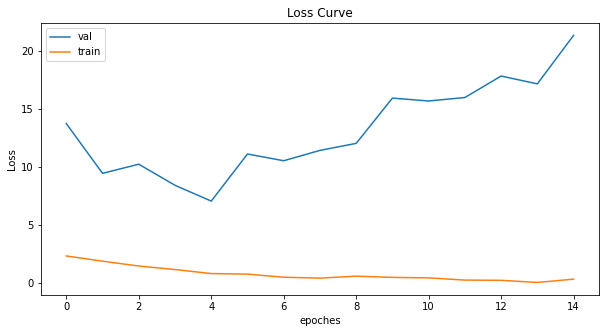

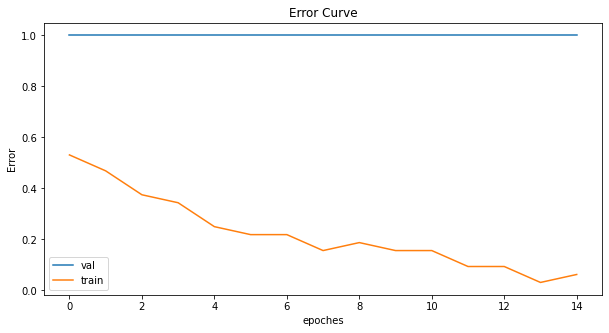

Forget time is: 133.11779618263245
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  21.323625564575195
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  7.768926620483398
Error:  0.7777777761220932
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
#test(model=resnet18_model, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='cifar', test_loader=cifar100_test, at_epoch=None)
#print('FORGETTING IMPLEMENTATION')
# All in one function
fd.noise.std = 0.4
fd.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.046571388840675354
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.598691701889038
Error:  0.5555555522441864
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.2860755920410156, "error": 0.59375}
[0] test metrics:{"loss": 6.881266117095947, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.8 sec
[1] train metrics:{"loss": 1.9152311086654663, "error": 0.46875}
[1] test metrics:{"loss": 9.58061408996582, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 8.79 sec
[2] train metrics:{"loss": 1.406006097793579, "error": 0.46875}
[2] test metrics:{"loss": 11.71196174621582, "er

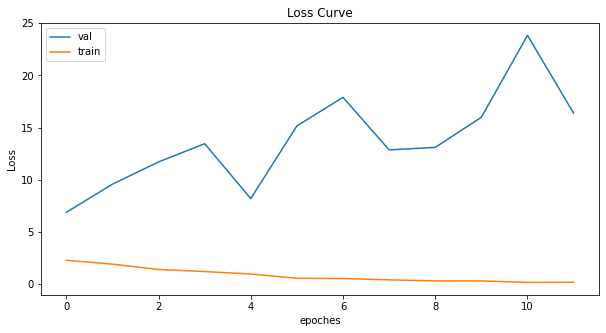

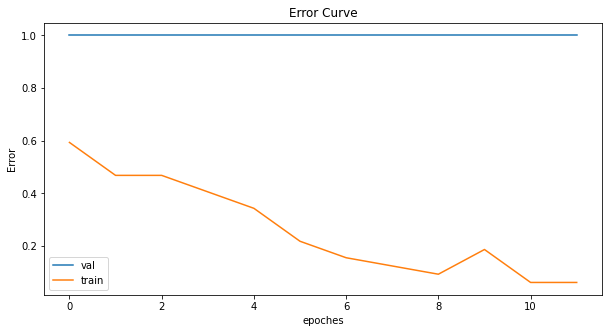

Forget time is: 105.93456149101257
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  16.388439178466797
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  6.2900872230529785
Error:  0.7777777761220932
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])

# All in one function
fd.noise.noise_type = 'speckle'
fd.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.046571388840675354
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.598691701889038
Error:  0.5555555522441864
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.357872724533081, "error": 0.625}
[0] test metrics:{"loss": 13.719974517822266, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.71 sec
[1] train metrics:{"loss": 2.0730674266815186, "error": 0.5}
[1] test metrics:{"loss": 8.89352798461914, "error": 1.0}
Epoch number: 1 
Epoch Time: 8.78 sec
[2] train metrics:{"loss": 1.5886870622634888, "error": 0.40625}
[2] test metrics:{"loss": 8.511046409606934, "error": 1.0}
Epoch number: 2 
Epoch Time: 8

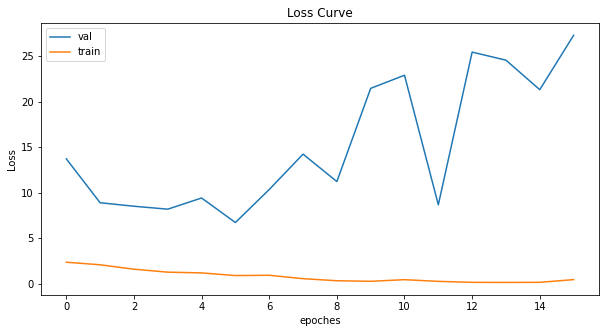

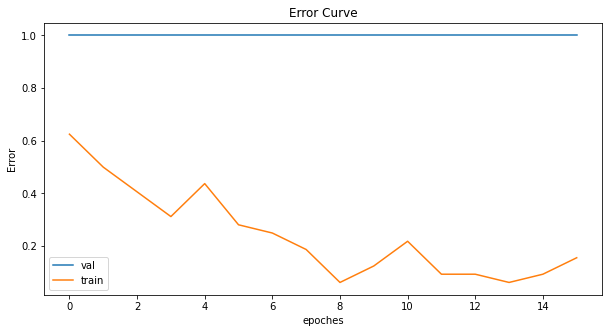

Forget time is: 140.996497631073
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  27.298629760742188
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  8.477110862731934
Error:  0.6666666567325592
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])

# All in one function
fd.noise.std = 0.4
fd.noise.noise_type = 'poisson'
fd.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.046571388840675354
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.598691701889038
Error:  0.5555555522441864
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.342442512512207, "error": 0.53125}
[0] test metrics:{"loss": 13.73145580291748, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.76 sec
[1] train metrics:{"loss": 1.8940049409866333, "error": 0.46875}
[1] test metrics:{"loss": 9.45162296295166, "error": 1.0}
Epoch number: 1 
Epoch Time: 8.8 sec
[2] train metrics:{"loss": 1.4765652418136597, "error": 0.375}
[2] test metrics:{"loss": 10.23746109008789, "error": 1.0}
Epoch number: 2 
Epoch Time:

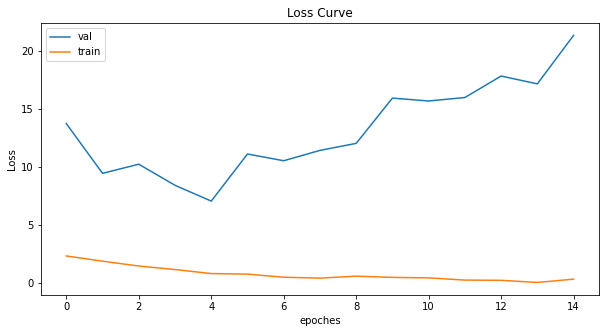

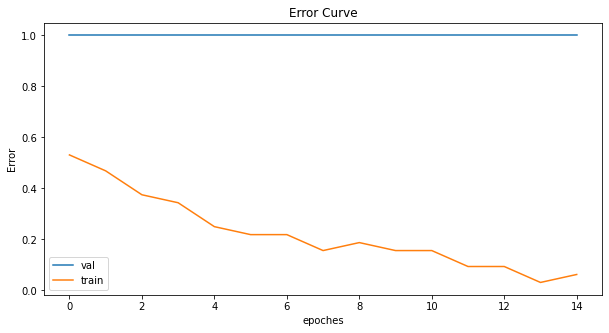

Forget time is: 132.1247136592865
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  21.323625564575195
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  7.768926620483398
Error:  0.7777777761220932
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
#test(model=resnet18_model, loss='ce', lossfn=None, optimizer='sgd', device=device, dataset='cifar', test_loader=cifar100_test, at_epoch=None)
#print('FORGETTING IMPLEMENTATION')
# All in one function
fd.noise.noise_type = 's&p'
fd.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044083744287491
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914824485779
Error:  0.19999998807907104
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 1.3246004581451416, "error": 0.375}
[0] test metrics:{"loss": 0.3178306519985199, "error": 0.050000011920928955}
Epoch number: 0 
Epoch Time: 0.37 sec
[1] train metrics:{"loss": 1.2867048978805542, "error": 0.375}
[1] test metrics:{"loss": 0.410980224609375, "error": 0.09999996423721313}
Epoch number: 1 
Epoch Time: 0.38 sec
[2] train metrics:{"loss": 1.2637393474578857, "error": 0.3125}
[2] test metrics:{"loss": 0.5166962146759033

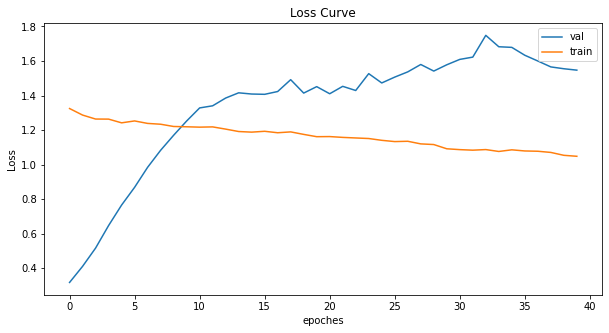

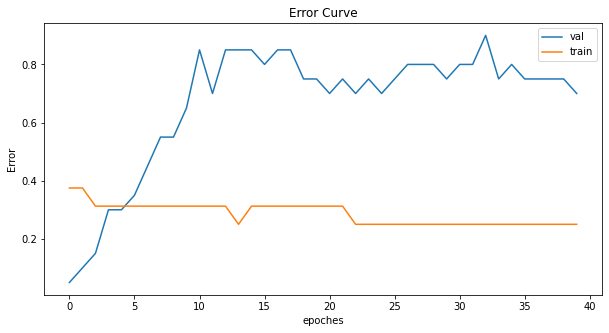

Forget time is: 15.33394980430603
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.5467615127563477
Error:  0.699999988079071
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.483041375875473
Error:  0.19999998807907104
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function
fd = FD(0, 0.1)
fd.noise.std = 5.0
fd.forget_class(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train, val_loader=fmnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

#### Negative Information Allocation

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.044820401817560196
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.03935350850224495
Error:  0.0
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.031829334795475006, "error": 0.0}
[0] test metrics:{"loss": 0.006902874447405338, "error": 0.0}
Epoch number: 0 
Epoch Time: 0.38 sec
[1] train metrics:{"loss": 0.03179589658975601, "error": 0.0}
[1] test metrics:{"loss": 0.006865138188004494, "error": 0.0}
Epoch number: 1 
Epoch Time: 0.37 sec
[2] train metrics:{"loss": 0.03178364783525467, "error": 0.0}
[2] test metrics:{"loss": 0.006854139268398285, "error": 0.0}
Epoch number: 2 
Epoch Time: 0.37 sec
[3] train metrics:{"loss": 0.031776178

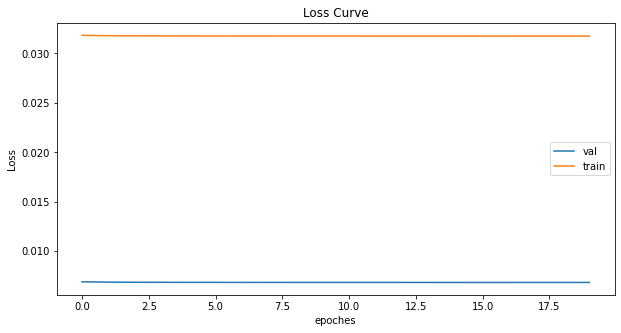

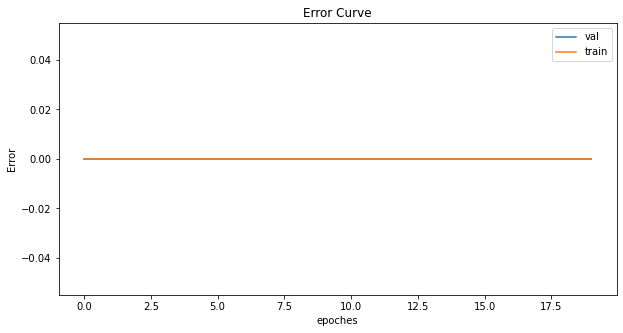

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.8496972918510437, "error": 0.25}
[0] test metrics:{"loss": 3.8161094188690186, "error": 1.0}
Epoch number: 0 
Epoch Time: 3.72 sec
[1] train metrics:{"loss": 0.3095501959323883, "error": 0.125}
[1] test metrics:{"loss": 3.903001308441162, "error": 0.5999999940395355}
Epoch number: 1 
Epoch Time: 3.68 sec
[2] train metrics:{"loss": 0.3256663978099823, "error": 0.125}
[2] test metrics:{"loss": 4.852298736572266, "error": 0.7999999970197678}
Epoch number: 2 
Epoch Time: 3.66 sec
[3] train metrics:{"loss": 0.9608493447303772, "error": 0.25}
[3] test metrics:{"loss": 3.4805073738098145, "error": 0.7999999970197678}
Epoch number: 3 
Epoch Time: 3.69 sec
[4] train metrics:{"loss": 0.08779393881559372, "error": 0.0}
[4] test metrics:{"loss": 3.699195146560669, "error": 0.7999999970197678}
Epoch number: 4 
Epoch Time: 3.67 sec
[5] 

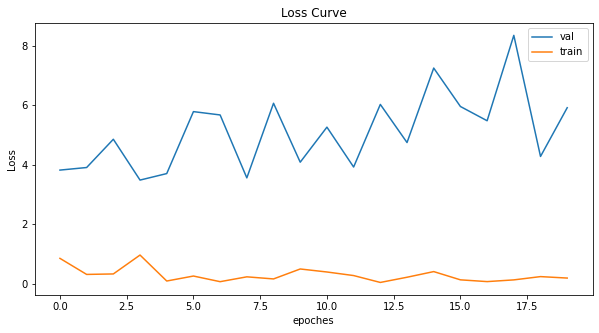

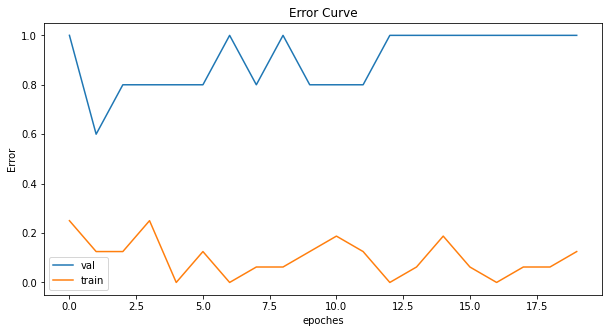

Forget time is: 73.69431924819946
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  5.912886142730713
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04883626475930214
Error:  0.0
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

# All in one class
nia = NIA()
#print(nia.encoder_model)
model = nia.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.32783040404319763
Error:  0.05263155698776245
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.25657379627227783
Error:  0.06896549463272095
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.06251802295446396, "error": 0.027027010917663574}
[0] test metrics:{"loss": 0.06000590696930885, "error": 0.03921562433242798}
Epoch number: 0 
Epoch Time: 0.12 sec
[1] train metrics:{"loss": 0.06251802295446396, "error": 0.027027010917663574}
[1] test metrics:{"loss": 0.06000590696930885, "error": 0.03921562433242798}
Epoch number: 1 
Epoch Time: 0.12 sec
[2] train metrics:{"loss": 0.06251802295446396, "error": 0.027027010917663574}
[2] test metrics:{"loss": 0

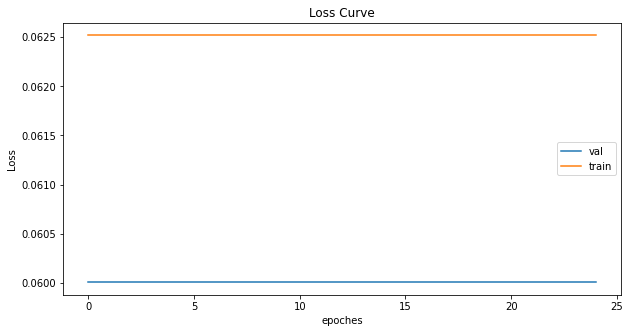

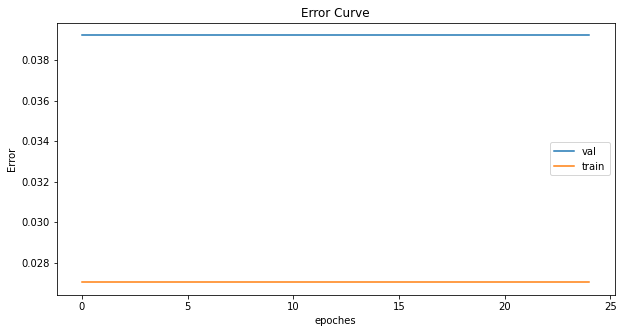

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.16426235437393188, "error": 0.0625}
[0] test metrics:{"loss": 1.3438594341278076, "error": 0.2631579041481018}
Epoch number: 0 
Epoch Time: 2.82 sec
[1] train metrics:{"loss": 0.051725149154663086, "error": 0.0}
[1] test metrics:{"loss": 1.2049461603164673, "error": 0.2631579041481018}
Epoch number: 1 
Epoch Time: 3.09 sec
[2] train metrics:{"loss": 0.11937425285577774, "error": 0.0625}
[2] test metrics:{"loss": 1.5573108196258545, "error": 0.3684210777282715}
Epoch number: 2 
Epoch Time: 3.15 sec
[3] train metrics:{"loss": 0.07890014350414276, "error": 0.0}
[3] test metrics:{"loss": 2.8607959747314453, "error": 0.6842105388641357}
Epoch number: 3 
Epoch Time: 2.83 sec
[4] train metrics:{"loss": 0.0038469277787953615, "error": 0.0}
[4] test metrics:{"loss": 2.5695912837982178, "error": 0.5789473652839661}
Epoch number: 4 


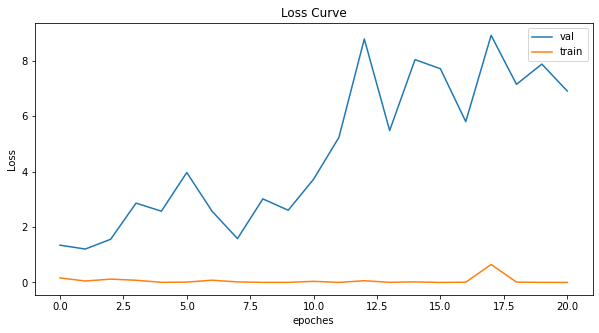

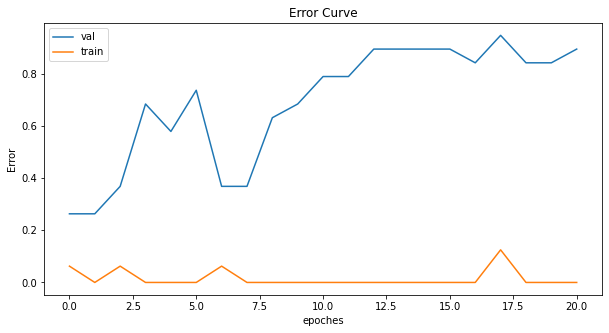

Forget time is: 62.63188362121582
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  6.904369831085205
Error:  0.8947368413209915
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7089560031890869
Error:  0.06896549463272095
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])

# All in one class
nia = NIA()
#print(nia.encoder_model)
model = nia.forget_class(class_id=1, model=dnn_model, loss='ce', optimizer='adam', epochs=25, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 0.8742995858192444, "error": 0.1794871687889099}
[0] test metrics:{"loss": 1.423305630683899, "error": 0.24000000953674316}
Epoch number: 0 
Epoch Time: 0.06 sec
[1] train metrics:{"loss": 0.0641363263130188, "error": 0.0}
[1] test metrics:{"loss": 0.2033359855413437, "error": 0.020000040531158447}
Epoch number: 1 
Epoch Time: 0.06 sec
[2] train metrics:{"loss": 0.05143391340970993, "error": 0.0}
[2] test metrics:{"loss": 0.12976382672786713, "error": 0.020000040531158447}


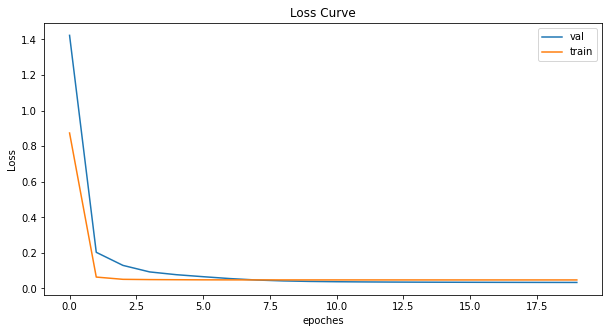

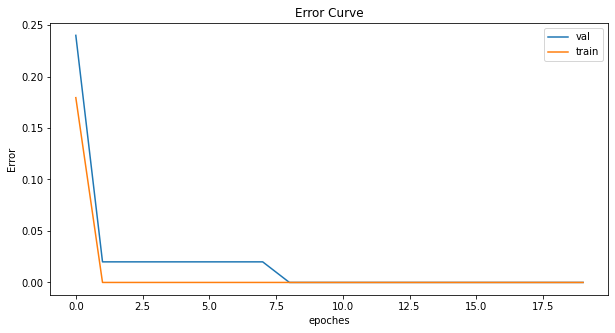

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.8881592750549316, "error": 0.6875}
[0] test metrics:{"loss": 7.519705772399902, "error": 1.0}
Epoch number: 0 
Epoch Time: 9.2 sec
[1] train metrics:{"loss": 1.9403340816497803, "error": 0.53125}
[1] test metrics:{"loss": 9.649876594543457, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 9.48 sec
[2] train metrics:{"loss": 1.4130055904388428, "error": 0.34375}
[2] test metrics:{"loss": 13.06328296661377, "error": 1.0}
INFO: Early stopping counter 2 of 10
Epoch number: 2 
Epoch Time: 9.22 sec
[3] train metrics:{"loss": 1.5547150373458862, "error": 0.4375}
[3] test metrics:{"loss": 8.709336280822754, "error": 1.0}
Epoch number: 3 
Epoch Time: 9.06 sec
[4] train metrics:{"loss": 2.0759739875793457, "error": 0.4375}
[4] test metrics:{"loss": 11.857576370239258, "error": 1.0}
INFO: Early sto

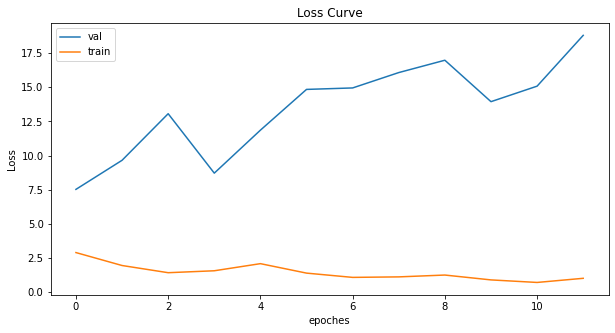

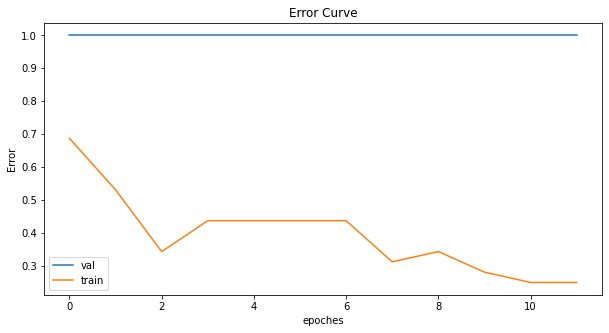

Forget time is: 111.24110841751099
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  18.8054256439209
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.562699556350708
Error:  0.36666661500930786
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])

# All in one class
nia = NIA()
#print(nia.encoder_model)
model = nia.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044083744287491
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914824485779
Error:  0.19999998807907104
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 0.5046616792678833, "error": 0.1428571343421936}
[0] test metrics:{"loss": 0.6276369094848633, "error": 0.25}
Epoch number: 0 
Epoch Time: 0.11 sec
[1] train metrics:{"loss": 0.5046616792678833, "error": 0.1428571343421936}
[1] test metrics:{"loss": 0.6276369094848633, "error": 0.25}
Epoch number: 1 
Epoch Time: 0.09 sec
[2] train metrics:{"loss": 0.5046616792678833, "error": 0.1428571343421936}
[2] test metrics:{"loss": 0.6276369094848633, "error": 0.25}
Epoch numbe

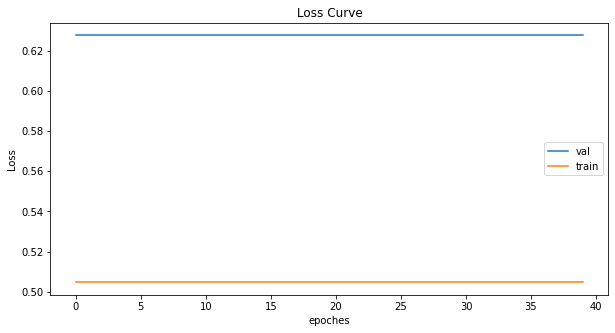

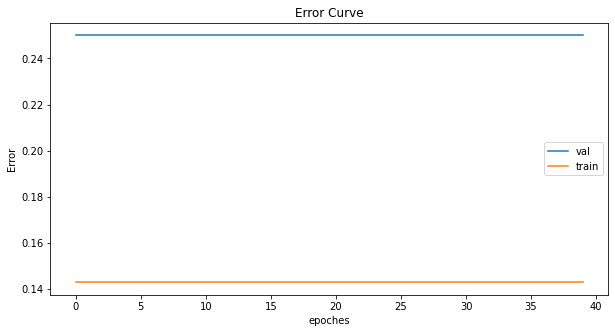

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 0.8304849863052368, "error": 0.3125}
[0] test metrics:{"loss": 5.600584983825684, "error": 1.0}
Epoch number: 0 
Epoch Time: 1.81 sec
[1] train metrics:{"loss": 0.7108308672904968, "error": 0.1875}
[1] test metrics:{"loss": 8.006376266479492, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 1.8 sec
[2] train metrics:{"loss": 0.6588084697723389, "error": 0.125}
[2] test metrics:{"loss": 9.558793067932129, "error": 1.0}
INFO: Early stopping counter 2 of 10
Epoch number: 2 
Epoch Time: 1.78 sec
[3] train metrics:{"loss": 0.6769102215766907, "error": 0.1875}
[3] test metrics:{"loss": 10.626202583312988, "error": 1.0}
INFO: Early stopping counter 3 of 10
Epoch number: 3 
Epoch Time: 1.79 sec
[4] train metrics:{"loss": 0.5027905702590942, "error": 0.25}
[4] test metrics:{"loss": 11.56601

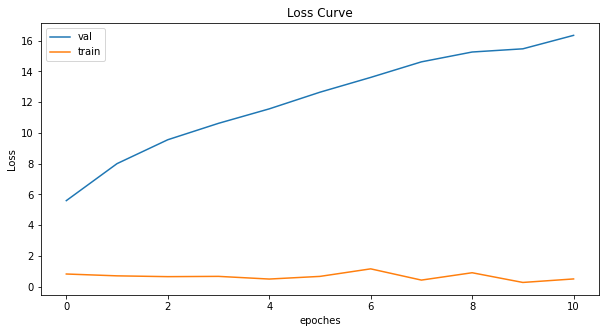

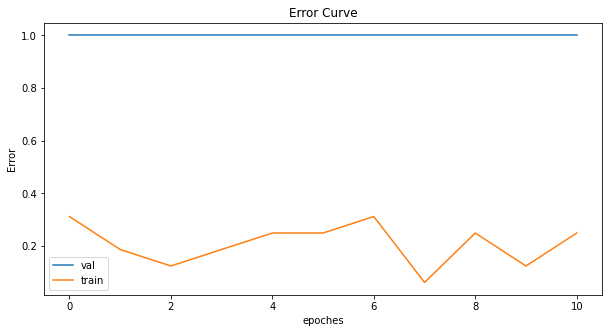

Forget time is: 20.147712469100952
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  16.34531593322754
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.5715585947036743
Error:  0.19999998807907104
FINISHED TESTING


LinearRegression(
  (linear): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function
nia = NIA()
nia.forget_class(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train, val_loader=fmnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

#### Backward learning

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

# All in one class
bl = BL()

model = bl.forget_class(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_val,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.044820401817560196
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.03935350850224495
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 22.36585807800293, "error": 1.0}
[0] test metrics:{"loss": 40.188331604003906, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.34 sec
[1] train metrics:{"loss": 2.769510269165039, "error": 1.0}
[0] test metrics:{"loss": 0.03223591297864914, "error": 0.0}
Epoch number: 1 :
 Epoch Time: 2.92 sec
[1] train metrics:{"loss": 44.15147399902344, "error": 1.0}
[1] test metrics:{"loss": 86.59146881103516, "error": 1.0}
Epoch number: 2 :
 Epoch Time: 0.33 sec
[3] train

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])

# All in one class
bl = BL()
#print(nia.encoder_model)
model = bl.forget_class(class_id=1, model=dnn_model, loss='ce', optimizer='adam', epochs=5, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_val,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.32783040404319763
Error:  0.05263155698776245
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.25657379627227783
Error:  0.06896549463272095
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.09313450753688812, "error": 0.0}
[0] test metrics:{"loss": 0.5900728106498718, "error": 0.10526317358016968}
Epoch number: 0 :
 Epoch Time: 0.18 sec
[1] train metrics:{"loss": 0.05061415582895279, "error": 0.0}
[0] test metrics:{"loss": 0.24810749292373657, "error": 0.06896549463272095}
Epoch number: 1 :
 Epoch Time: 1.42 sec
[1] train metrics:{"loss": 5.0254926681518555, "error": 1.0}
[1] test metrics:{"loss": 5.235012054443

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])

# All in one class
bl = BL()
#print(nia.encoder_model)
model = bl.forget_class(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=10, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train, val_loader=cifar100_val,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 29.43314552307129, "error": 1.0}
[0] test metrics:{"loss": 58.88576126098633, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.11 sec
[1] train metrics:{"loss": 0.14066506922245026, "error": 0.04000002145767212}
[0] test metrics:{"loss": 0.23856569826602936, "error": 0.09999996423721313}
Epoch number: 1 :
 Epoch Time: 9.26 sec
[1] train metrics:{"loss": 59.81539535522461, "error": 1.0}
[1] test metrics:{"loss": 97.77132415771484, "error": 1

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function
bl = BL()
bl.forget_class(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train, val_loader=fmnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044083744287491
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914824485779
Error:  0.19999998807907104
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 16.1480770111084, "error": 1.0}
[0] test metrics:{"loss": 15.576324462890625, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.06 sec
[1] train metrics:{"loss": 0.9760264158248901, "error": 0.29032260179519653}
[1] test metrics:{"loss": 0.48204007744789124, "error": 0.1499999761581421}
Epoch number: 1 :
 Epoch Time: 0.37 sec
[1] train metrics:{"loss": 57.97420883178711, "error": 1.0}
[2] test metrics:{"loss": 61.4858512878418, "error

### Forget image

#### Feature Destruction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label tensor(0)


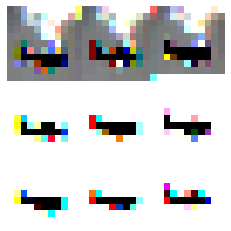

In [ ]:
img, lab = get_random_img(cifar10_test)
img = img.view(32, 32, -1)
plt.axis("off")
print("Label", lab)
plt.imshow(img)

SEED SET TO:  13
--------------------
True label is:  tensor(9)
Predicted label is:  tensor(9, device='cuda:0')
--------------------
INITIAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.4947831630706787
Error:  0.4375
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.006397956050932407, "error": 0.0}
[0] test metrics:{"loss": 4.041232585906982, "error": 0.4375}
Epoch number: 0 
Epoch Time: 3.98 sec
[1] train metrics:{"loss": 0.0009260656661354005, "error": 0.0}
[1] test metrics:{"loss": 1.249446988105774, "error": 0.25}
Epoch number: 1 
Epoch Time: 3.97 sec
[2] train metrics:{"loss": 0.0002967870968859643, "error": 0.0}
[2] test metrics:{"loss": 4.722125053405762, "error": 0.375}
INFO: Early stopping counter 1 of 10
Epoch number: 2 
Epoch Time: 3.96 sec
[3] train metrics:{"loss": 7.045020902296528e-0

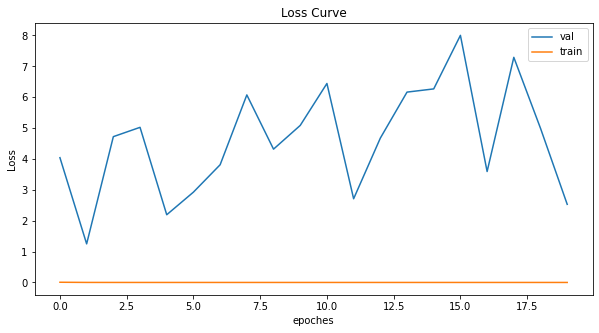

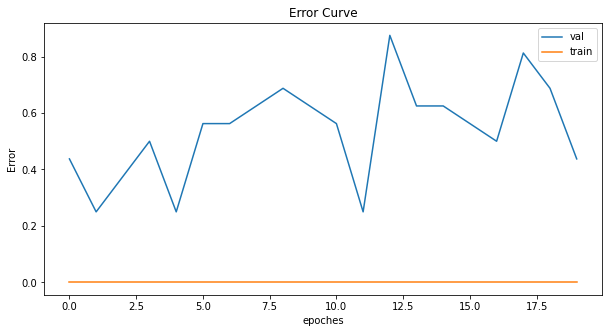

Forget time is: 79.87231206893921
--------------------
FINAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  4.552799224853516
Error:  0.8125
FINISHED TESTING
--------------------
True label is:  tensor(9)
Predicted label is:  tensor(9, device='cuda:0')


In [ ]:
img = img.view(-1, 32, 32)
imglab = (img, lab)

fd = FD(0, 0.1)
#plab = predict(cnn_model, img, device)
#print(plab)
fd.forget_image(imglab=imglab, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, ds=cifar10_train, ds_test=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
True label is:  tensor(2)
Predicted label is:  tensor(2, device='cuda:0')
--------------------
INITIAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.07034817337989807
Error:  0.0
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 28.812763214111328, "error": 1.0}
[0] test metrics:{"loss": 0.5352754592895508, "error": 0.0625}
Epoch number: 0 
Epoch Time: 2.08 sec
[1] train metrics:{"loss": 0.1171981543302536, "error": 0.0}
[1] test metrics:{"loss": 0.3539535701274872, "error": 0.125}
Epoch number: 1 
Epoch Time: 2.08 sec
[2] train metrics:{"loss": 4.768370445162873e-07, "error": 0.0}
[2] test metrics:{"loss": 0.41903743147850037, "error": 0.25}
Epoch number: 2 
Epoch Time: 2.09 sec
[3] train metrics:{"loss": 0.0, "error": 0.0}
[3] test metrics:{"loss": 0.0198542065918

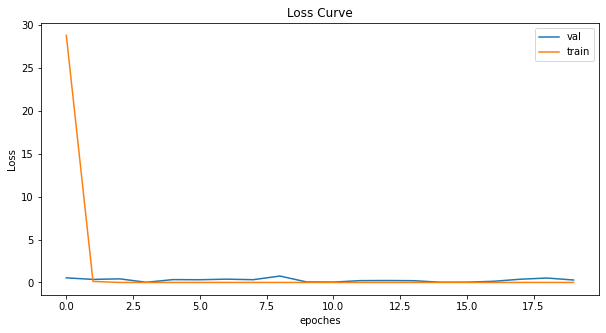

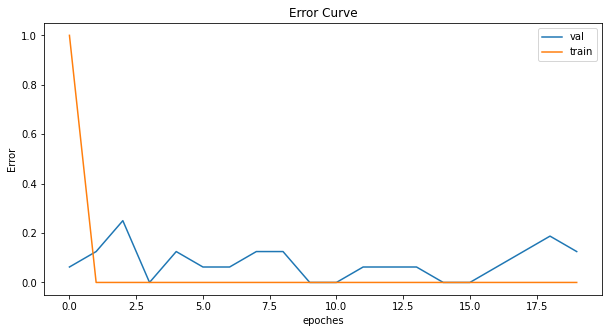

Forget time is: 43.16333293914795
--------------------
FINAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.15551818907260895
Error:  0.0625
FINISHED TESTING
--------------------
True label is:  tensor(2)
Predicted label is:  tensor(2, device='cuda:0')


In [ ]:
imglab = get_random_img(mnist_train)
fd = FD(0, 1.5)
#plab = predict(cnn_model, img, device)
#print(plab)
fd.forget_image(imglab=imglab, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, ds=mnist_train, ds_test=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
True label is:  tensor(9)
Predicted label is:  tensor(9, device='cuda:0')
--------------------
INITIAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  4.552799224853516
Error:  0.8125
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 8.571772575378418, "error": 0.6969696879386902}
Epoch number: 0 
Epoch Time: 0.02 sec
[1] train metrics:{"loss": 9.950862884521484, "error": 0.6666666567325592}
Epoch number: 1 
Epoch Time: 0.02 sec
[2] train metrics:{"loss": 6.353423595428467, "error": 0.6060605943202972}
Epoch number: 2 
Epoch Time: 0.02 sec
[3] train metrics:{"loss": 6.822173118591309, "error": 0.6969696879386902}
Epoch number: 3 
Epoch Time: 0.02 sec
[4] train metrics:{"loss": 6.281644344329834, "error": 0.7272727191448212}
Epoch number: 4 
Epoch Time: 0.02 sec
[5] train metrics:{"loss": 

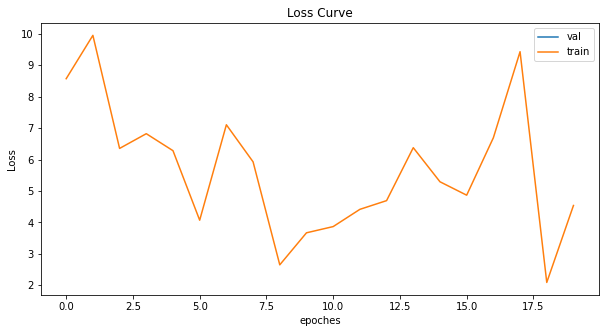

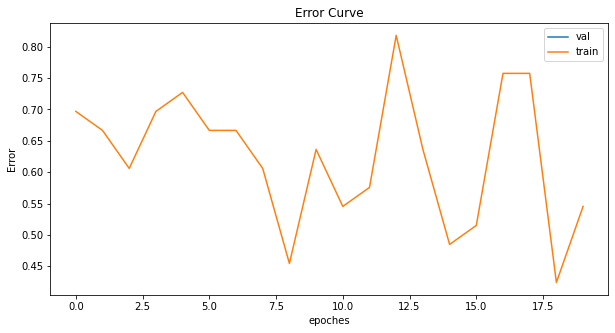

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 3.781872034072876, "error": 1.0}
[0] test metrics:{"loss": 7.511660099029541, "error": 0.625}
Epoch number: 0 
Epoch Time: 72.77 sec
[1] train metrics:{"loss": 0.00331234117038548, "error": 0.0}
[1] test metrics:{"loss": 12.22464370727539, "error": 0.625}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 72.33 sec
[2] train metrics:{"loss": 0.00018082413589581847, "error": 0.0}
[2] test metrics:{"loss": 10.387895584106445, "error": 0.625}
INFO: Early stopping counter 2 of 10
Epoch number: 2 
Epoch Time: 73.51 sec
[3] train metrics:{"loss": 0.0004980515805073082, "error": 0.0}
[3] test metrics:{"loss": 8.148690223693848, "error": 0.5}
Epoch number: 3 
Epoch Time: 71.91 sec
[4] train metrics:{"loss": 0.008474932983517647, "error": 0.0}
[4] test metrics:{"loss": 6.0379791259765625, "error": 0.5}
Epoch number: 4 

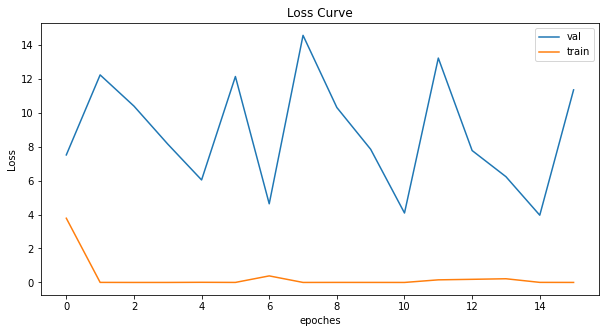

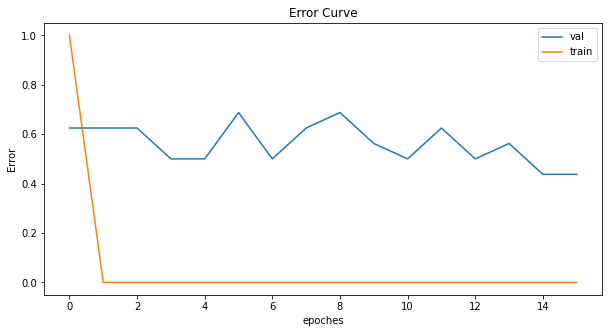

Forget time is: 1164.401169538498
--------------------
FINAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  7.2520952224731445
Error:  0.625
FINISHED TESTING
--------------------
True label is:  tensor(9)
Predicted label is:  tensor(9, device='cuda:0')


In [ ]:
#imglab = get_random_img(cnn_train)
img = img.view(-1, 32, 32)
imglab = (img, lab)

nia = NIA()
#plab = predict(cnn_model, img, device)
#print(plab)
nia.forget_image(imglab=imglab, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, ds=cifar10_train, ds_test=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

In [ ]:
'''
nia = NIA()
#plab = predict(cnn_model, img, device)
#print(plab)

nia.forget_image(imglab=imglab, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, ds=mnist_train, ds_test=mnist_test,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)
'''

"\nnia = NIA()\n#plab = predict(cnn_model, img, device)\n#print(plab)\n\nnia.forget_image(imglab=imglab, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, ds=mnist_train, ds_test=mnist_test,\n    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)\n"

In [ ]:
#img = img.view(-1, 32, 32)
#imglab = (img, lab)
imglab = get_random_img(cifar10_test)

bl = BL()
#plab = predict(cnn_model, img, device)
#print(plab)
bl.forget_image(imglab=imglab, model=cnn_model, loss='ce', optimizer='adam', epochs=5, device=device, dataset='cifar', lossfn=None, ds=cifar10_train, ds_test=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.01, momentum=0.)

SEED SET TO:  13
--------------------
True label is:  tensor(0)
Predicted label is:  tensor(0, device='cuda:0')
--------------------
INITIAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.4329969584941864
Error:  0.1875
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 13.220407485961914, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.01 sec
[1] train metrics:{"loss": 0.7313706874847412, "error": 0.25}
Epoch number: 1 :
 Epoch Time: 5.53 sec
[1] train metrics:{"loss": 8.998697280883789, "error": 1.0}
Epoch number: 2 :
 Epoch Time: 0.01 sec
[3] train metrics:{"loss": 0.9567931890487671, "error": 0.375}
Epoch number: 3 :
 Epoch Time: 5.54 sec
FINISHED TRAINING
--------------------
FINAL D PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.479056715965271
Erro

### Forget subset of data

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.1306125372648239
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.22685614228248596
Error:  0.09090906381607056
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.661332607269287, "error": 0.5}
[0] test metrics:{"loss": 3.5585484504699707, "error": 1.0}
Epoch number: 0 
Epoch Time: 3.1 sec
[1] train metrics:{"loss": 2.204848289489746, "error": 0.8125}
[1] test metrics:{"loss": 5.2240986824035645, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 3.13 sec
[2] train metrics:{"loss": 2.421238899230957, "error": 0.8125}
[2] test metrics:{"loss": 3.7248153686523438, "error": 0.

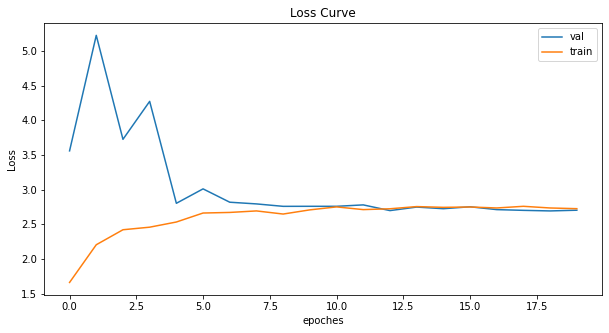

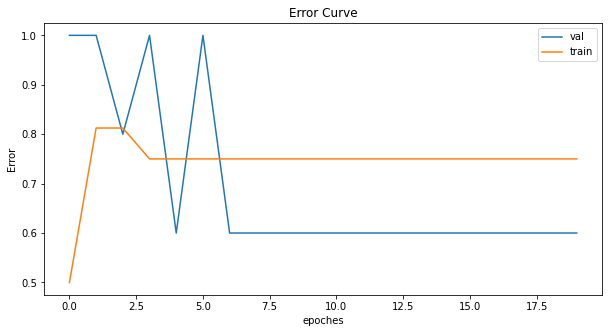

Forget time is: 62.68279957771301
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.704174757003784
Error:  0.7999999970197678
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.6370019912719727
Error:  0.6363636255264282
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

fd = FD(0, 6.0)
fd.forget_subset(img_num=200, class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train,
    scheduler=None, weight_decay=0.15, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.00955308135598898
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.5034704804420471
Error:  0.14285707473754883
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.5713725090026855, "error": 0.125}
[0] test metrics:{"loss": 1.8462519645690918, "error": 1.0}
Epoch number: 0 
Epoch Time: 0.31 sec
[1] train metrics:{"loss": 0.6268424391746521, "error": 0.125}
[1] test metrics:{"loss": 1.7723603248596191, "error": 0.5}
Epoch number: 1 
Epoch Time: 0.32 sec
[2] train metrics:{"loss": 0.7558490037918091, "error": 0.125}
[2] test metrics:{"loss": 0.7389447093009949, "error": 0.0}
Epoch number: 2 
Epoch Time: 0

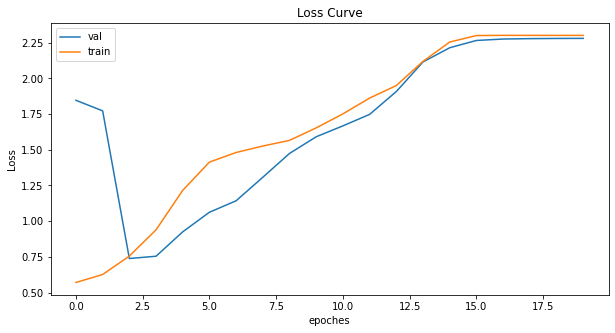

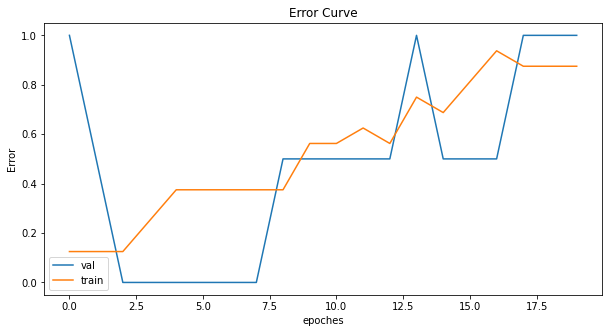

Forget time is: 7.52241325378418
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.279653787612915
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.302300214767456
Error:  0.8571428507566452
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
fd = FD(0.0, 1.0)
#fd.noise.std = 9.4
fd.forget_subset(img_num=100, class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=mnist_val,
    scheduler=None, weight_decay=0.15, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.1306125372648239
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.22685614228248596
Error:  0.09090906381607056
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.8395794034004211, "error": 0.13513511419296265}
Epoch number: 0 
Epoch Time: 0.08 sec
[1] train metrics:{"loss": 0.39626339077949524, "error": 0.08108103275299072}
Epoch number: 1 
Epoch Time: 0.07 sec
[2] train metrics:{"loss": 0.2012132853269577, "error": 0.05405402183532715}
Epoch number: 2 
Epoch Time: 0.08 sec
[3] train metrics:{"loss": 0.0726047083735466, "error": 0.0}
Epoch number: 3 
Epoch Time: 0.07 sec
[4] train metrics:{"loss": 0.04423407092690468, "

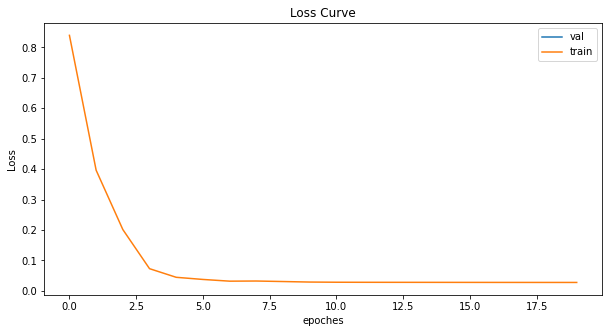

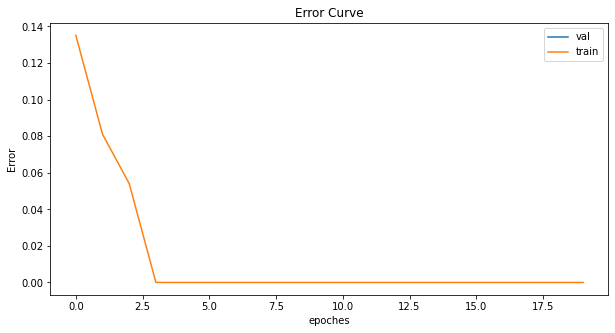

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.18149642646312714, "error": 0.0625}
[0] test metrics:{"loss": 0.544723391532898, "error": 0.3999999761581421}
Epoch number: 0 
Epoch Time: 3.29 sec
[1] train metrics:{"loss": 0.6340664625167847, "error": 0.125}
[1] test metrics:{"loss": 0.053616177290678024, "error": 0.0}
Epoch number: 1 
Epoch Time: 3.3 sec
[2] train metrics:{"loss": 0.29656651616096497, "error": 0.125}
[2] test metrics:{"loss": 0.1249317079782486, "error": 0.0}
Epoch number: 2 
Epoch Time: 3.21 sec
[3] train metrics:{"loss": 0.3841095268726349, "error": 0.1875}
[3] test metrics:{"loss": 0.02611548639833927, "error": 0.0}
Epoch number: 3 
Epoch Time: 3.23 sec
[4] train metrics:{"loss": 0.2913152873516083, "error": 0.125}
[4] test metrics:{"loss": 0.11839123070240021, "error": 0.0}
Epoch number: 4 
Epoch Time: 3.35 sec
[5] train metrics:{"loss": 0.21049465

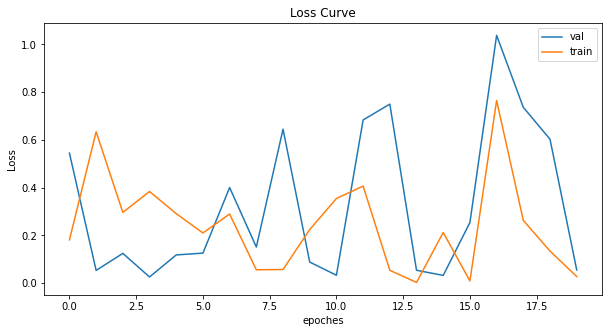

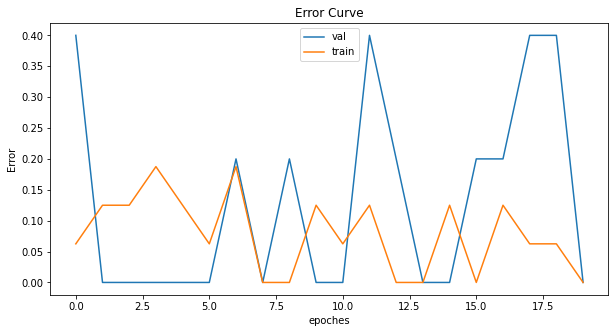

Forget time is: 66.30488348007202
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.05553766340017319
Error:  0.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.009246638044714928
Error:  0.0
FINISHED TESTING


CNN(
  (features): Sequential(
    (0): ConvUnit(
      (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvUnit(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvUnit(
      (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Dropout(p=0.5, inplace=True)
    (4): ConvUnit(
      (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): ConvUnit(
      (0): Conv2

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

nia = NIA()
nia.forget_subset(img_num=200, class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.00955308135598898
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.5034704804420471
Error:  0.14285707473754883
FINISHED TESTING
--------------------
TRAINING ENCODER
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.21125847101211548, "error": 0.029411733150482178}
Epoch number: 0 
Epoch Time: 0.02 sec
[1] train metrics:{"loss": 0.2217978686094284, "error": 0.029411733150482178}
Epoch number: 1 
Epoch Time: 0.02 sec
[2] train metrics:{"loss": 0.14037448167800903, "error": 0.029411733150482178}
Epoch number: 2 
Epoch Time: 0.02 sec
[3] train metrics:{"loss": 0.11668401956558228, "error": 0.029411733150482178}
Epoch number: 3 
Epoch Time: 0.01 sec
[4] train metrics:{"loss": 

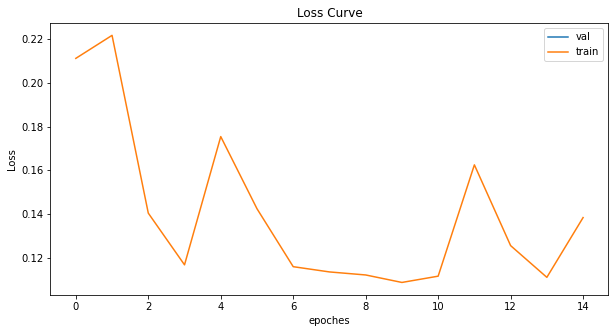

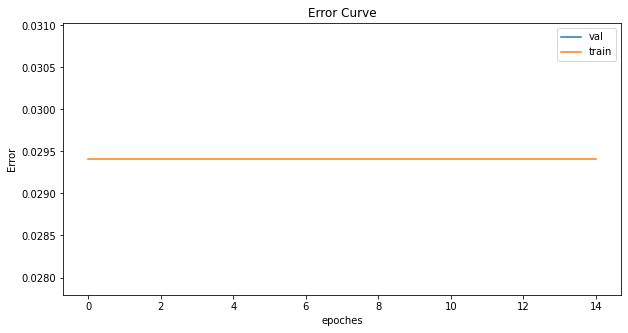

--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.6923140287399292, "error": 0.1875}
[0] test metrics:{"loss": 0.5922174453735352, "error": 0.0}
Epoch number: 0 
Epoch Time: 0.4 sec
[1] train metrics:{"loss": 0.6928955316543579, "error": 0.125}
[1] test metrics:{"loss": 0.9023742079734802, "error": 0.5}
Epoch number: 1 
Epoch Time: 0.45 sec
[2] train metrics:{"loss": 0.5494247078895569, "error": 0.125}
[2] test metrics:{"loss": 0.8254706859588623, "error": 0.5}
Epoch number: 2 
Epoch Time: 0.4 sec
[3] train metrics:{"loss": 0.6417641043663025, "error": 0.125}
[3] test metrics:{"loss": 1.2559022903442383, "error": 0.5}
Epoch number: 3 
Epoch Time: 0.44 sec
[4] train metrics:{"loss": 0.8436869382858276, "error": 0.125}
[4] test metrics:{"loss": 0.9607101082801819, "error": 0.5}
Epoch number: 4 
Epoch Time: 0.49 sec
[5] train metrics:{"loss": 0.957531213760376, "error": 0.37

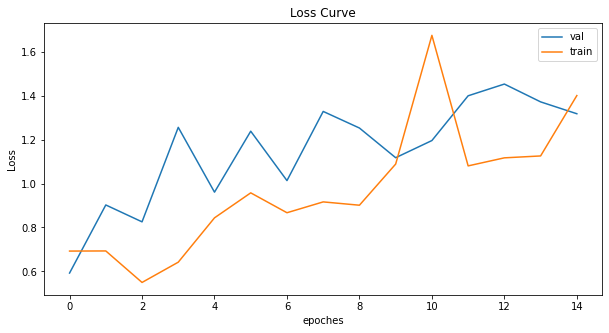

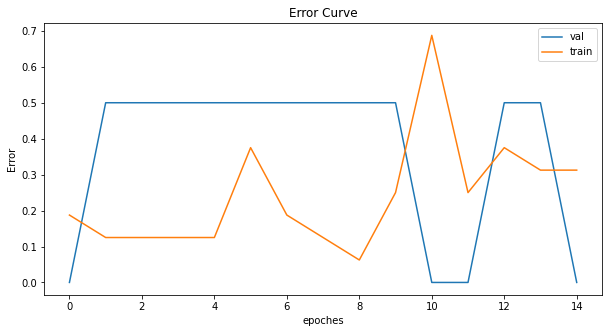

Forget time is: 6.948084831237793
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.3178844451904297
Error:  0.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.3763664960861206
Error:  0.5
FINISHED TESTING


MLP(
  (activation): ReLU()
  (layers): Sequential(
    (0): Linear(in_features=1024, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=64, bias=True)
    (15): ReLU()
    (16): Linear(in_features=64, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
# All in one function
nia = NIA()
#fd.noise.std = 9.4
nia.forget_subset(img_num=100, class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=15, device=device, dataset='mnist', lossfn=None, train_loader=mnist_val,
    scheduler=None, weight_decay=0.13, lr=0.001, momentum=0.)

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

bl = BL()
bl.forget_subset(img_num=200, class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.1306125372648239
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.22685614228248596
Error:  0.09090906381607056
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.1060454845428467, "error": 0.3999999761581421}
Epoch number: 0 :
 Epoch Time: 0.07 sec
[1] train metrics:{"loss": 0.7606955170631409, "error": 0.27272725105285645}
Epoch number: 1 :
 Epoch Time: 2.96 sec
[1] train metrics:{"loss": 2.095111846923828, "error": 0.3999999761581421}
Epoch number: 2 :
 Epoch Time: 0.07 sec
[3] train metrics:{"loss": 0.2973439395427704, "error": 0.1818181276321411}
Epoch number: 3 :
 Epoch Time: 3.0 sec
[2] train me

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])

bl = BL()
bl.forget_subset(img_num=200, class_id=None, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train,
    scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

SEED SET TO:  13
--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.1306125372648239
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.22685614228248596
Error:  0.09090906381607056
FINISHED TESTING
--------------------
FORGETTING PROCESS
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.1060454845428467, "error": 0.3999999761581421}
Epoch number: 0 :
 Epoch Time: 0.07 sec
[1] train metrics:{"loss": 0.7606955170631409, "error": 0.27272725105285645}
Epoch number: 1 :
 Epoch Time: 3.08 sec
[1] train metrics:{"loss": 2.095111846923828, "error": 0.3999999761581421}
Epoch number: 2 :
 Epoch Time: 0.08 sec
[3] train metrics:{"loss": 0.2973439395427704, "error": 0.1818181276321411}
Epoch number: 3 :
 Epoch Time: 3.11 sec
[2] train m

### Retrain

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.044820401817560196
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.03935350850224495
Error:  0.0
FINISHED TESTING
--------------------
RETRAINING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.1796088218688965, "error": 0.3333333134651184}
[0] test metrics:{"loss": 8.178454399108887, "error": 1.0}
Epoch number: 0 
Epoch Time: 2.8 sec
[1] train metrics:{"loss": 0.6825025677680969, "error": 0.0}
[1] test metrics:{"loss": 9.471518516540527, "error": 1.0}
Epoch number: 1 
Epoch Time: 2.77 sec
[2] train metrics:{"loss": 0.5240666270256042, "error": 0.0}
[2] test metrics:{"loss": 10.602323532104492, "error": 1.0}
Epoch number: 2 
Epoch Time: 2.78 sec
[3] train metrics:{"loss"

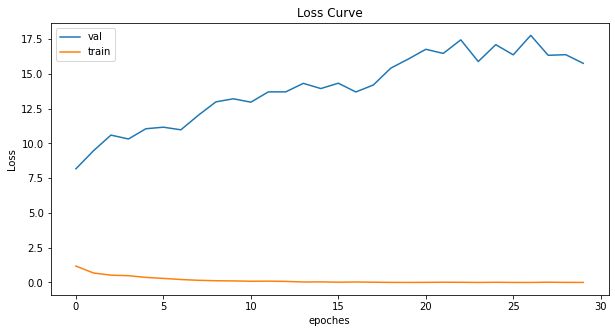

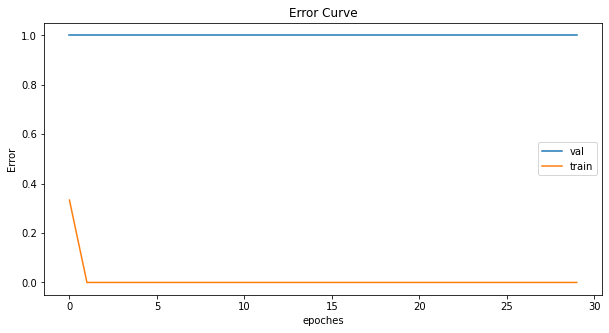

Forget time is: 83.34500908851624
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  15.766413688659668
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.15555129945278168
Error:  0.09090906381607056
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
retrain(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=30, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train,
    val_loader=cifar10_val, scheduler=None, weight_decay=0.0, lr=0.0003, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.09930070489645004
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.8636372089385986
Error:  0.25
FINISHED TESTING
--------------------
RETRAINING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 1.5579487085342407, "error": 0.7916666567325592}
[0] test metrics:{"loss": 11.228906631469727, "error": 1.0}
Epoch number: 0 
Epoch Time: 1.38 sec
[1] train metrics:{"loss": 1.2721647024154663, "error": 0.5}
[1] test metrics:{"loss": 22.483713150024414, "error": 1.0}
INFO: Early stopping counter 1 of 100
Epoch number: 1 
Epoch Time: 1.43 sec
[2] train metrics:{"loss": 0.6192987561225891, "error": 0.2083333134651184}
[2] test metrics:{"loss": 23.90160369873047, "error": 1.0}
INFO: Ear

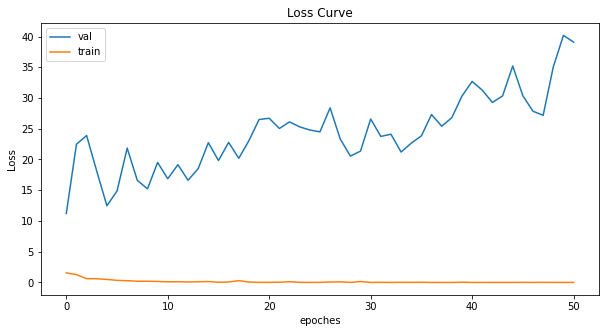

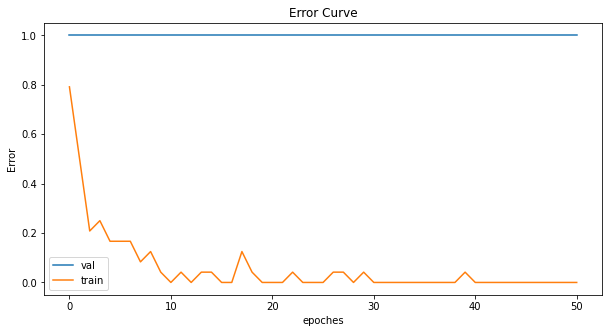

Forget time is: 73.9835114479065
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  39.091495513916016
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  3.447214126586914
Error:  0.375
FINISHED TESTING


In [12]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
retrain(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=51, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
RETRAINING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 3.98001766204834, "error": 0.8400000035762787}
[0] test metrics:{"loss": 8.793103218078613, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.81 sec
[1] train metrics:{"loss": 3.83420991897583, "error": 0.8400000035762787}
[1] test metrics:{"loss": 9.699860572814941, "error": 1.0}
Epoch number: 1 
Epoch Time: 8.78 sec
[2] train metrics:{"loss": 3.744032382965088, "error": 0.9200000017881393}
[2] test metrics:{"loss": 10.581368446350098, "error": 1.0}
Epoch number: 2 


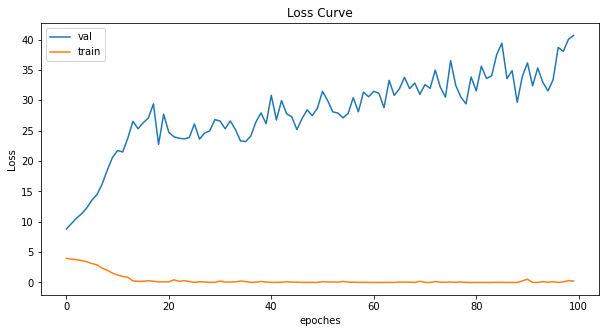

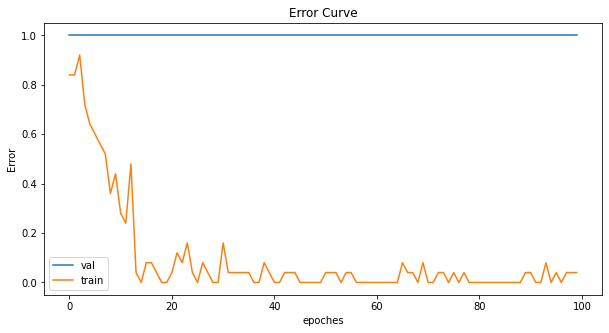

Forget time is: 863.5066268444061
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  40.69384765625
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  4.293553352355957
Error:  0.3999999761581421
FINISHED TESTING


In [ ]:
retrain(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=100, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train,
    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044082254171371
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914228439331
Error:  0.19999998807907104
FINISHED TESTING
--------------------
RETRAINING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 1.589066743850708, "error": 0.3870967626571655}
[0] test metrics:{"loss": 5.8184614181518555, "error": 1.0}
Epoch number: 0 
Epoch Time: 0.38 sec
[1] train metrics:{"loss": 1.3940351009368896, "error": 0.3225806951522827}
[1] test metrics:{"loss": 7.315878391265869, "error": 1.0}
Epoch number: 1 
Epoch Time: 0.4 sec
[2] train metrics:{"loss": 1.307941198348999, "error": 0.3548387289047241}
[2] test metrics:{"loss": 8.389959335327148, "error": 1.0}
Epoch nu

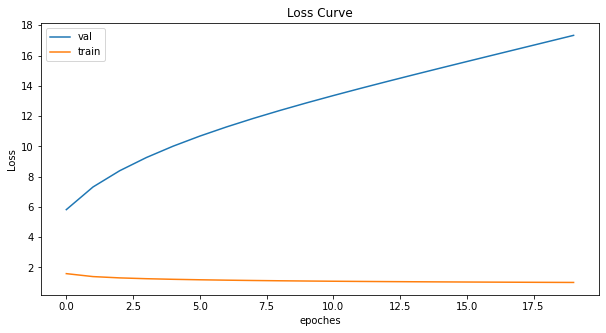

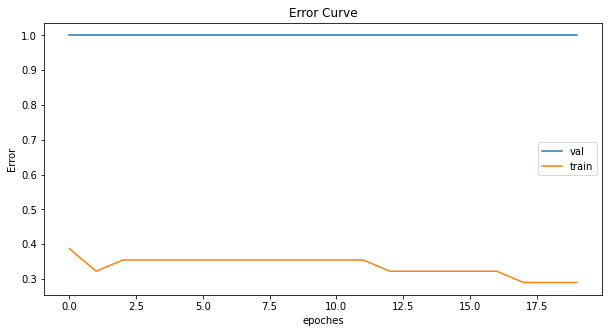

Forget time is: 8.30971074104309
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  17.33523178100586
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.6224084496498108
Error:  0.1499999761581421
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function
retrain(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train,
    val_loader=fmnist_test, scheduler=None, weight_decay=0.0, lr=1e-4, momentum=0.)

##Classical methods

###Finetune

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
FINETUNING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.19962942600250244, "error": 0.0}
[0] test metrics:{"loss": 1.2180438041687012, "error": 0.29032260179519653}
Epoch number: 0 
Epoch Time: 2.79 sec
[1] train metrics:{"loss": 0.1436164230108261, "error": 0.0}
[1] test metrics:{"loss": 1.6894044876098633, "error": 0.4838709831237793}
Epoch number: 1 
Epoch Time: 2.76 sec
[2] train metrics:{"loss": 0.010081700049340725, "error": 0.0}
[2] test metrics:{"loss": 1.9715728759765625, "error": 0.4838709831237793

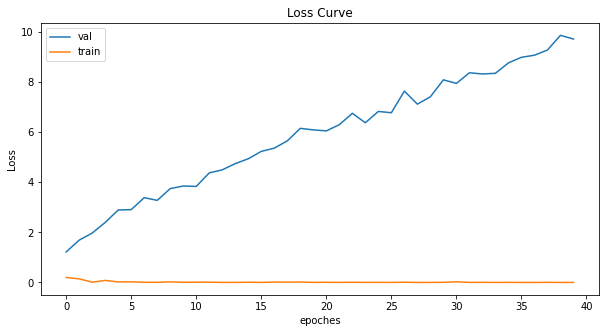

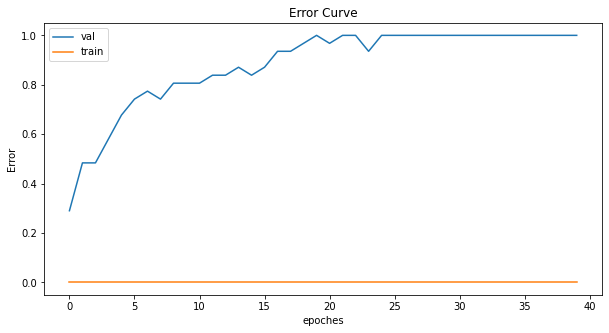

Forget time is: 110.90108180046082
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  9.714685440063477
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.9529509544372559
Error:  0.4444444179534912
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
fine_tune(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=40, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.09930070489645004
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.8636372089385986
Error:  0.25
FINISHED TESTING
--------------------
FINETUNING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.169785276055336, "error": 0.08333331346511841}
[0] test metrics:{"loss": 1.0101162195205688, "error": 0.375}
Epoch number: 0 
Epoch Time: 1.3 sec
[1] train metrics:{"loss": 0.06025351956486702, "error": 0.0}
[1] test metrics:{"loss": 1.5666589736938477, "error": 0.75}
Epoch number: 1 
Epoch Time: 1.29 sec
[2] train metrics:{"loss": 0.012740989215672016, "error": 0.0}
[2] test metrics:{"loss": 2.770801544189453, "error": 1.0}
Epoch number: 2 
Epoch Time: 1.32 sec
[3] train metrics:{

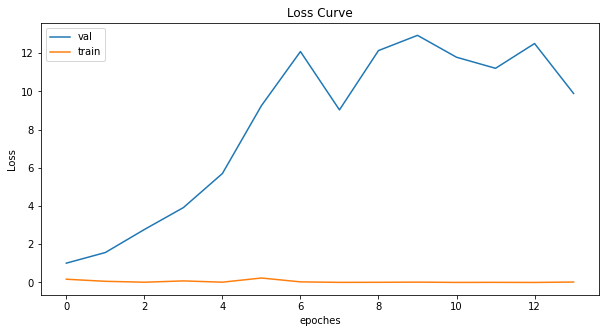

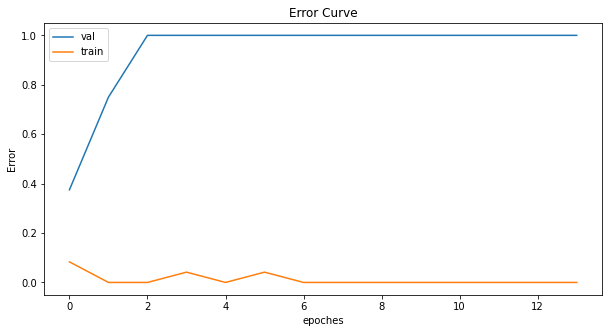

Forget time is: 18.45400881767273
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  9.890647888183594
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.6228923201560974
Error:  0.125
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
fine_tune(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
FINETUNING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.622218370437622, "error": 0.6400000154972076}
[0] test metrics:{"loss": 10.559650421142578, "error": 1.0}
Epoch number: 0 
Epoch Time: 8.66 sec
[1] train metrics:{"loss": 2.276794195175171, "error": 0.5600000023841858}
[1] test metrics:{"loss": 15.103140830993652, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 8.68 sec
[2] train metrics:{"loss": 1.8327996730804443, "error": 0.40000003576278687}
[2] test metrics:{"loss": 16.08709

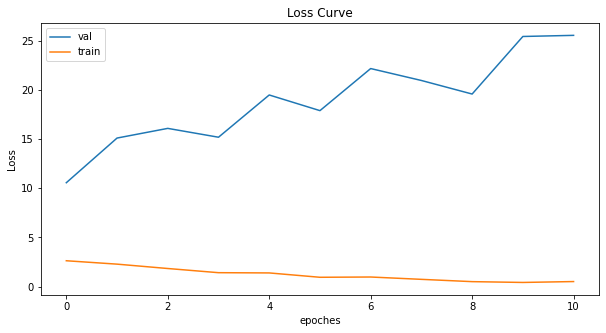

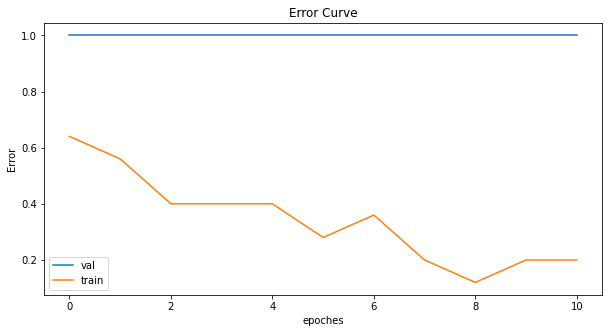

Forget time is: 95.62468075752258
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  25.550451278686523
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.046522617340088
Error:  0.36666661500930786
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
fine_tune(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train,
    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044082254171371
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914228439331
Error:  0.19999998807907104
FINISHED TESTING
--------------------
FINETUNING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 1.0193032026290894, "error": 0.29032260179519653}
[0] test metrics:{"loss": 5.68409538269043, "error": 1.0}
Epoch number: 0 
Epoch Time: 0.38 sec
[1] train metrics:{"loss": 0.9970069527626038, "error": 0.22580647468566895}
[1] test metrics:{"loss": 7.800414085388184, "error": 1.0}
INFO: Early stopping counter 1 of 10
Epoch number: 1 
Epoch Time: 0.36 sec
[2] train metrics:{"loss": 0.9789785146713257, "error": 0.22580647468566895}
[2] test metrics:{"loss": 

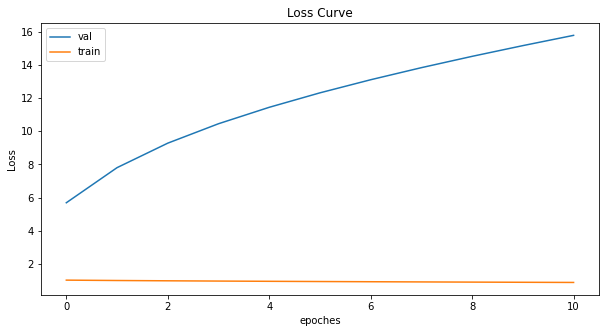

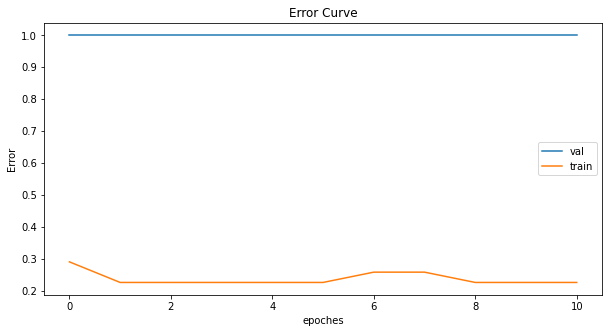

Forget time is: 4.612536191940308
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  15.776403427124023
Error:  1.0
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.5108283758163452
Error:  0.25
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function

fine_tune(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train,
    val_loader=fmnist_test, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

### Random labels

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
random_labels(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
RANDOMING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 0.028344660997390747, "error": 0.0}
[0] test metrics:{"loss": 1.5615534782409668, "error": 0.3870967626571655}
Epoch number: 0 :
 Epoch Time: 2.77 sec
[1] train metrics:{"loss": 0.05323857069015503, "error": 0.0}
[1] test metrics:{"loss": 2.145031213760376, "error": 0.5483871102333069}
Epoch number: 1 :
 Epoch Time: 2.79 sec
[2] train metrics:{"loss": 0.012382502667605877, "error": 0.0}
[2] test metrics:{"loss": 2.4218010902404785, "error": 0.6129032373428

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
random_labels(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.09930070489645004
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.8636372089385986
Error:  0.25
FINISHED TESTING
--------------------
RANDOMING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.169785276055336, "error": 0.08333331346511841}
[0] test metrics:{"loss": 1.0101162195205688, "error": 0.375}
Epoch number: 0 :
 Epoch Time: 1.3 sec
[1] train metrics:{"loss": 0.06025351956486702, "error": 0.0}
[1] test metrics:{"loss": 1.5666589736938477, "error": 0.75}
Epoch number: 1 :
 Epoch Time: 1.35 sec
[2] train metrics:{"loss": 0.012740989215672016, "error": 0.0}
[2] test metrics:{"loss": 2.770801544189453, "error": 1.0}
Epoch number: 2 :
 Epoch Time: 1.25 sec
[3] train metr

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
random_labels(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train,
    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
RANDOMING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 2.622218370437622, "error": 0.6400000154972076}
[0] test metrics:{"loss": 10.559650421142578, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 8.86 sec
[1] train metrics:{"loss": 2.276794195175171, "error": 0.5600000023841858}
[1] test metrics:{"loss": 15.103140830993652, "error": 1.0}
Epoch number: 1 :
 Epoch Time: 8.63 sec
[2] train metrics:{"loss": 1.8327996730804443, "error": 0.40000003576278687}
[2] test metrics:{"loss": 16.087095260620117, "error": 1.0}
Epoch nu

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function

random_labels(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train,
    val_loader=fmnist_test, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044082254171371
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914228439331
Error:  0.19999998807907104
FINISHED TESTING
--------------------
RANDOMING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 0.7899731397628784, "error": 0.22580647468566895}
[0] test metrics:{"loss": 5.464463233947754, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.38 sec
[1] train metrics:{"loss": 0.7621028423309326, "error": 0.22580647468566895}
[1] test metrics:{"loss": 7.507852077484131, "error": 1.0}
Epoch number: 1 :
 Epoch Time: 0.37 sec
[2] train metrics:{"loss": 0.7409346699714661, "error": 0.22580647468566895}
[2] test metrics:{"loss": 8.946880340576172, "error": 1.0}


### Hiding

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
HIDING
SEED SET TO:  13
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in Sequential_training]
[0] train metrics:{"loss": 1.154746413230896, "error": 0.3333333134651184}
[0] test metrics:{"loss": 5.556830406188965, "error": 1.0}
Epoch number: 0 
Epoch Time: 2.84 sec
[1] train metrics:{"loss": 0.7866267561912537, "error": 0.3333333134651184}
[1] test metrics:{"loss": 6.580369472503662, "error": 1.0}
Epoch number: 1 
Epoch Time: 2.8 sec
[2] train metrics:{"loss": 0.449955016374588, "error": 0.0}
[2] test metrics:{"loss": 7.137643814086914, "error": 1.0}
Epo

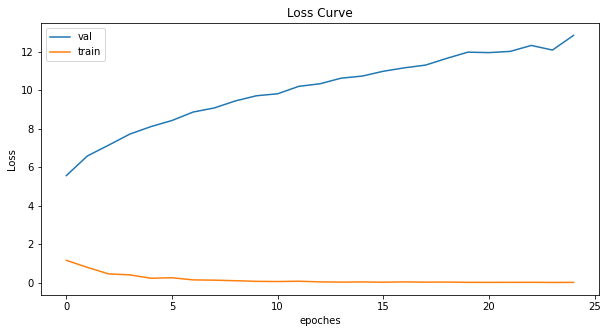

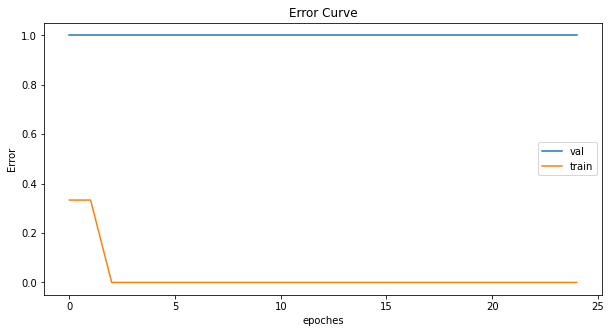

Forget time is: 69.61388754844666
--------------------
FINAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  2.9215505123138428
Error:  0.6451613008975983
FINISHED TESTING
--------------------
FINAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.3743442893028259
Error:  0.2222222089767456
FINISHED TESTING


In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
hiding(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=25, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

In [ ]:
'''
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
hiding(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)
'''

'\ncheckpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")\ndnn_model.load_state_dict(checkpoint[\'model\'])\nhiding(class_id=0, model=dnn_model, loss=\'ce\', optimizer=\'adam\', epochs=20, device=device, dataset=\'mnist\', lossfn=None, train_loader=mnist_train,\n    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)\n'

In [ ]:
'''
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
hiding(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train,
    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)
'''

'\ncheckpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")\nresnet18_model.load_state_dict(checkpoint[\'model\'])\nhiding(class_id=0, model=resnet18_model, loss=\'ce\', optimizer=\'adam\', epochs=20, device=device, dataset=\'cifar\', lossfn=None, train_loader=cifar100_train,\n    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)\n'

In [ ]:
'''
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function

hiding(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train,
    val_loader=fmnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)
'''

'\ncheckpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")\nregression.load_state_dict(checkpoint[\'model\'])\n# All in one function\n\nhiding(class_id=0, model=regression, loss=\'ce\', optimizer=\'adam\', epochs=40, device=device, dataset=\'mnist\', lossfn=None, train_loader=fmnist_train,\n    val_loader=fmnist_val, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)\n'

### Negative gradient

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{cnn_model.__class__.__name__}_{70}.pth.tar")
cnn_model.load_state_dict(checkpoint['model'])
neg_gradient(class_id=0, model=cnn_model, loss='ce', optimizer='adam', epochs=25, device=device, dataset='cifar', lossfn=None, train_loader=cifar10_train, val_loader=cifar10_test,
    scheduler=None, weight_decay=0.0, lr=0.00001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7173795104026794
Error:  0.19354844093322754
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.0722668170928955
Error:  0.2222222089767456
FINISHED TESTING
--------------------
ASCENDING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 21.178272247314453, "error": 1.0}
[0] test metrics:{"loss": 8.149834632873535, "error": 0.838709682226181}
Epoch number: 0 :
 Epoch Time: 0.33 sec
[1] train metrics:{"loss": 20.95929718017578, "error": 1.0}
[1] test metrics:{"loss": 8.759418487548828, "error": 0.838709682226181}
Epoch number: 1 :
 Epoch Time: 0.32 sec
[2] train metrics:{"loss": 20.76891326904297, "error": 1.0}
[2] test metrics:{"loss": 8.92363452911377, "error": 0.8064516186714172}
Epoch n

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{dnn_model.__class__.__name__}_{50}.pth.tar")
dnn_model.load_state_dict(checkpoint['model'])
neg_gradient(class_id=0, model=dnn_model, loss='ce', optimizer='adam', epochs=15, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
    val_loader=mnist_val, scheduler=None, weight_decay=0.0, lr=0.0001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.09930070489645004
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.8636372089385986
Error:  0.25
FINISHED TESTING
--------------------
ASCENDING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 10.282532691955566, "error": 1.0}
[0] test metrics:{"loss": 1.5989975929260254, "error": 0.5}
Epoch number: 0 :
 Epoch Time: 0.22 sec
[1] train metrics:{"loss": 4.747643947601318, "error": 1.0}
[1] test metrics:{"loss": 3.826019048690796, "error": 1.0}
Epoch number: 1 :
 Epoch Time: 0.2 sec
[2] train metrics:{"loss": 2.685227632522583, "error": 1.0}
[2] test metrics:{"loss": 5.082702159881592, "error": 1.0}
Epoch number: 2 :
 Epoch Time: 0.15 sec
[3] train metrics:{"loss": 1.789794325

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{resnet18_model.__class__.__name__}_{200}.pth.tar")
resnet18_model.load_state_dict(checkpoint['model'])
neg_gradient(class_id=0, model=resnet18_model, loss='ce', optimizer='adam', epochs=20, device=device, dataset='cifar', lossfn=None, train_loader=cifar100_train,
    val_loader=cifar100_val, scheduler=None, weight_decay=0.0, lr=0.00001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04123486950993538
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.04855159670114517
Error:  0.03333330154418945
FINISHED TESTING
--------------------
ASCENDING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 9.109033584594727, "error": 1.0}
[0] test metrics:{"loss": 6.114216327667236, "error": 0.7777777761220932}
Epoch number: 0 :
 Epoch Time: 0.11 sec
[1] train metrics:{"loss": 6.412865161895752, "error": 1.0}
[1] test metrics:{"loss": 15.343626022338867, "error": 1.0}
Epoch number: 1 :
 Epoch Time: 0.14 sec
[2] train metrics:{"loss": 4.0724005699157715, "error": 0.7142857015132904}
[2] test metrics:{"loss": 21.73226547241211, "error": 1.0}
Epoch number: 2 :
 Epoch T

In [ ]:
checkpoint = torch.load(f"/content/drive/My Drive/project/URP/checkpoints/{regression.__class__.__name__}_{50}.pth.tar")
regression.load_state_dict(checkpoint['model'])
# All in one function

neg_gradient(class_id=0, model=regression, loss='ce', optimizer='adam', epochs=40, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train,
    val_loader=fmnist_test, scheduler=None, weight_decay=0.0, lr=0.001, momentum=0.)

--------------------
INITIAL Df PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.10044082254171371
Error:  0.0
FINISHED TESTING
--------------------
INITIAL Dr PERFOMANCE
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.7837914228439331
Error:  0.19999998807907104
FINISHED TESTING
--------------------
ASCENDING
SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 3.4310755729675293, "error": 0.7647058814764023}
[0] test metrics:{"loss": 11.83668327331543, "error": 1.0}
Epoch number: 0 :
 Epoch Time: 0.06 sec
[1] train metrics:{"loss": 0.3263885974884033, "error": 0.11764705181121826}
[1] test metrics:{"loss": 19.988569259643555, "error": 1.0}
Epoch number: 1 :
 Epoch Time: 0.05 sec
[2] train metrics:{"loss": 0.1610163450241089, "error": 0.05882352590560913}
[2] test metrics:{"loss": 22.491527557373047, "error": 1.0}

### Download stuff

In [ ]:
#save_state(cnn_model, set_optimizer('adam', cnn_model.parameters(), 0.001, 0.001, 0.8), './checkpoints/CNN_forget_20.pth.tar')
!ls ./checkpoints
from google.colab import files
files.download('./checkpoints/CNN_20.pth.tar')

CNN_20.pth.tar	MLP_14.pth.tar	      ResNet18_11.pth.tar
CNN_30.pth.tar	ResNet18_100.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls checkpoints
from google.colab import files
files.download('./checkpoints/MLP_NIA25.pth.tar')

CNN_random_labels20.pth.tar  MLP_random_labels20.pth.tar
CNN_random_labels25.pth.tar  ResNet18_12.pth.tar
MLP_21.pth.tar		     ResNet18_NIA20.pth.tar
MLP_NIA25.pth.tar	     ResNet18_random_labels20.pth.tar
MLP_random_labels15.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cd drive/MyDrive/project/URP/forgetting
!ls

drive  sample_data


In [ ]:
!python catastrophic_forget.py

/content
